[View in Colaboratory](https://colab.research.google.com/github/fabiansd/AI-workshop/blob/master/AI_workshop_melbourne.ipynb)

Forfatter: Fabian Sødal Dietrichson

Github: https://github.com/fabiansd/AI-workshop/blob/master/AI_workshop_melbourne.ipynb

# Datasett

Beskrivelse av datasett:

https://www.kaggle.com/c/home-data-for-ml-course/data


Alle måleenhetene utgjør hver sin kolonne, og kalles *features*


# Importering av data og python-bibliotek

Python tillater å bruke mange forskjellige ferdigskrevne funksjoner. Disse lagres i biblioteker som må importeres før de kan brukes. 

### Bibliotek dokumentasjon

Pandas (datahåndtering) <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">dokumentasjon</a> og <a href="https://pandas.pydata.org/pandas-docs/stable/10min.html#min">tutorial</a> <br> 


Seaborn (plottefunksjoner) <a href="https://seaborn.pydata.org/index.html">dokumentasjon </a> og <a href="https://seaborn.pydata.org/tutorial.html">tutorial</a> <br>

Matplotlib (plottestøttefunksjoner) <a href="https://matplotlib.org/gallery/index.html"> dokumentasjon </a> og <a href="https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python">tutorial </a> <br>

Scikit-learn (maskinlæring) <a href="http://scikit-learn.org/stable/" > dokumentasjon </a> og <a href="http://scikit-learn.org/stable/tutorial/index.html"> tutorial </a> <br>

I python heter **Scikit-learn** biblioteket **sklearn** for enkelhetens skyld

Bruk google hyppig, se på eksempler!

In [2]:
## Import av biblioteker 
import sklearn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Laster ned datasettet fra lenken og lagrer dette som filen Melbourne_train.csv
from six.moves import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/fabiansd/AI-workshop/master/data/Melbourne_train.csv", "./Melbourne_train.csv")

('./Melbourne_train.csv', <http.client.HTTPMessage at 0x7f5c54379908>)

# Databehandling

Første steg i et AI-prosjekt er å undersøke og studere dataen. Pandas har mange funksjoner som kan hjelpe til med dette. Det er viktig få et innblikk i hvordan dataen ser ut og hva slag verdier den faktisk inneholder. Pandas kan sammenliknes med excel, bare for python.


## Opplasting av data

Dataen blir lest og lastet opp av pandas biblioteket. Dette gjøres ved å bruke pandas-funksjonen <br>
$pd.read\_csv('filnavn.csv')$. <br>Funksjonen tar en parameter som er filstien til csv-filen vi har lastet ned. Parameteren må være av typen String. Det betyr tekst og må skrives inne mellom anførselstegn. <br> I dette tilfellet er parameteren<i> "Melbourne_train.csv"</i><br>

Funksjonen returnerer et objekt fra Pandas, kalt Dataframe, som representerer datasettet vårt. I dette tilfellet heter objektet, eller Dataframen, $data$

In [0]:
data = pd.read_csv('Melbourne_train.csv')

En Pandas dataframe har mange funksjoner. Disse utfører ulike operasjoner på dataen. <br>
Eksempelvis kan man skrive ut de n førset elementene i datasettet ved å skrive: <br> $data.head(n)$ <br>
Denne funksjonen tar parametre av typen heltall, også kalt Integer.<br> I dette tilfellet er parameteren <i>n=10</i>

In [4]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

På samme vis kan de 5 siste elementene vises ved å skrive: 
<br>$data.tail(5)$

In [5]:
data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Videre kan det være nyttig å skrive ut navnet på alle kolonnene i datasettet vårt. Disse er lagret i en variabel til objektet $data$, og kan aksesseres ved å skrive $data.columns$

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Denne informasjonen er nyttig når man vil hente ut spesifikk data fra en pandas dataframe. Du kan hente ut dataen i en kolonne ved å skrive

$ data.kolonnenavn $

Dataen du henter ut her vil ikke lenger være en dataframe, men en liste (array) med verdier.

In [7]:
data.SaleCondition.head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

Vi kan oppnå det samme ved å bruke klammer med kolonnenavnet. Da vil det se slik ut:

$data['kolonnenavn'] $

In [8]:
data['SaleCondition'].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

Pandas fungerer på mange måter som Excel. Man kan derfor hente ut verdier ved å refere til en bestemt "celle" i objektet. 
På den måten kan enkeltverdier hentes ut med tall-indeksering ved bruk av Pandas iloc-funksjonen. <br>

<br> $data.iloc[rad, kolonne] $ <br>


Eksempelvis kan data lagret i <i>rad 0</i> og <i>kolonne 3</i> hentes ut slik:

In [9]:
## Verdien fra linje 0, kolonne 3 lagres i variabelen verdi
verdi = data.iloc[0,3]

## Navnet på kolonne 3 lagres i variabelen feature
feature = data.columns[3]

## Skriver ut variablene feature og verdi
print(feature, verdi)

LotFrontage 65.0


Pandas kan også gi info om hva slags data som er lagret i datasettet og hvor mange instanser det er i hver kolonne. Dette gjøres gjennom funksjonen <br>
$data.info()$ <br>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Det kan også være greit å vite hvor mange linjer det faktisk er. Vi teller derfor antallet linjer i objektet $data$ ved å bruke funksjonen <br>
$len()$ <br>
Denne funksjonen kan ta objektet $data$, som vi ønsker å telle, som parameter.

In [11]:
## Skriver ut lengden på datasettet. Dvs antallet linjer i datasettet
print('\n Antall registreringer i datasettet: {}'.format(len(data)))


 Antall registreringer i datasettet: 1460


## Utforsking av data

Med pandas kan man få en statistisk oversikt over datasettet med funksjonen <br> $data.describe()$ <br> For eksempel kan vi se hva gjennomsnittlig salgspris er for alle salgene i datasettet. <br> Merk at oversikten viser kun numeriske features, og ikke kategoriske features som også finnes i datasettet. Kategoriske features kan være navn på nabolag eller type oppkjørsel.

In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Pandas har mange statistiske funksjoner som kan være nyttig. Hvis du ønsker å finne høyeste salgspris direkte, kan du bruke $.max()$ funksjonen på attributten du ønsker.

In [13]:
data['SalePrice'].max()

755000

Om du ønsker å hente ut registreringen med høyest salgspris derimot, må man benytte funksjonen $.idmax()$ som returnerer posisjonen til regisreringen med høyest salgspris i dataframen.

In [14]:
index_størst_salgspris = [data['SalePrice'].idxmax()]
data.iloc[index_størst_salgspris].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


Pandas tillater å hente ut enkeltkolonner, og man kan dermed hente ut attributtene man ønsker og eskludere de man ikke ønsker. Disse utvinnes ved å referere til "kolonnenavnet." For å lage en ny dataframe med utvalgte kolonner, må kolonnene hentes ut med en liste over kolonnenavn: <br>
$data[['Kolonnenavn1','kolonnenav2',...]]$<br>
I vårt tilfelle velger vi å lagre kolonnen med salgsår i en nytt pandas dataframe kalt $data\_ÅrSolgt$.

In [15]:
## Kolonnen "YrSold" lagres i et nytt Pandas-objekt kalt data_ÅrSolgt
data_ÅrSolgt = data[['YrSold']]

## Skriver ut de 10 første linjene i data_ÅrSolgt
data_ÅrSolgt.head()

,YrSold
0,2008
1,2007
2,2008
3,2006
4,2008


Man kan også filtrere ut spesifikk data, som for eksempel alle boliger solgt i 2008 ved å hente ut data som tilfredsstiller $ data['YrSold'] == 2008 $. Her kan man også hente ut alle boliger solgt etter 2008 ved å sette $ data['YrSold'] > 2008 $.

In [16]:
## Henter ut alle linjer der YrSold er lik 2008
data_Solgt2008 = data[data['YrSold'] == 2008]

## Skriver ut 10 første linjer av data_Solgt2008
data_Solgt2008.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Om man vil filtrere ut på en spesifikk attributt, kan man først spesifisere hvilke kolonner man vil ha ut, $data[['Neighborhood', 'PoolArea','PoolQC']] $ og deretter spesifisere filtreringen $[data['PoolArea'] > 0]$. Resultatet er en oversikt med nabolag, størrelse og kvalitet på basseng. Man kan også telle antall forekomster som blir igjen etter filtreringen ved å bruke $.count()$

In [17]:
data[['Neighborhood']][data['PoolArea'] > 0].count()

Neighborhood    7
dtype: int64

In [18]:
data[['Neighborhood', 'PoolArea','PoolQC']][data['PoolArea'] > 0].head(10)

,Neighborhood,PoolArea,PoolQC
197,NAmes,512,Ex
810,NWAmes,648,Fa
1170,Mitchel,576,Gd
1182,NoRidge,555,Ex
1298,Edwards,480,Gd
1386,NWAmes,519,Fa
1423,Edwards,738,Gd


En annen måte å filtrere på er å sette opp if-tester på kolonnene ved å bruke $ data.kolonnenavn$. Med denne metoden kan det settes opp flere filtreringer, for eksempel å filtrere ut alle boliger med boligareal større enn 15000 kvf i NridgHt nabolaget.

In [19]:
data_CollgCr_Pool = data[(data.Neighborhood == 'NridgHt') & (data.LotArea >= 15000)]
data_CollgCr_Pool.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
320,321,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370.0,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,NaN,Attchd,2006.0,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,342643
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,0,438,1848,GasA,Ex,Y,SBrkr,1848,880,0,2728,1,0,2,1,4,1,Ex,10,Typ,2,Ex,Attchd,2006.0,Fin,3,706,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
480,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,378.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1261,Unf,0,572,1833,GasA,Ex,Y,SBrkr,1850,0,0,1850,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,3,772,TA,TA,Y,519,112,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,326000
1359,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,FR3,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,66.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1447,Unf,0,533,1980,GasA,Ex,Y,SBrkr,1980,0,0,1980,1,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2004.0,Fin,3,770,TA,TA,Y,194,45,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000


Nye subdatasett kan konstrueres ut av det originale datasettet ved å hente ut ønskede kolonner med data. Dette lar deg konstruere helt nye datasett.<br>

Dette kan gjøres ved å lage en Pythons liste med **3** verdier av typen String; "MoSold", "YrSold", og "SalesPrice". $ ['MoSold', 'YrSold', 'SalesPrice']$ <br>

Deretter kan de ønskede kolonnene hentes ut med denne listen ved å sende listen inn som index i dataframen.

In [20]:
##  Henter ut kolonnene vi ønsker fra data. Lagres i data_salgsinfo
data_salgsinfo = data[['MoSold','YrSold','SalePrice']]

## Skriver ut de 10 første linjene i data_salgsinfo
data_salgsinfo.head(10)

,MoSold,YrSold,SalePrice
0,2,2008,208500
1,5,2007,181500
2,9,2008,223500
3,2,2006,140000
4,12,2008,250000
5,10,2009,143000
6,8,2007,307000
7,11,2009,200000
8,4,2008,129900
9,1,2008,118000


Nye features kan konstrueres ved å lage kombinasjoner av kolonner i datasettet. Siden kolonnen 'HouseAge' ikke finnes i datasettet vil det blir oprettet som en ny kolonne som inneholder data om hvor gammelt huset er. <br>Dette regnes ut ved å trekke årstallet for når huset ble solgt fra husets byggeår. 


In [21]:
## Regner ut husets alder og lagrer dette i en ny kolonne kalt HouseAge
data_salgsinfo['HouseAge'] = data['YrSold'] - data['YearBuilt']

## Skriver ut de 5 første linjene av data_salgsinfo for å se at den nye kolonnen er på plass med logiske verdier.
data_salgsinfo.head(5)

,MoSold,YrSold,SalePrice,HouseAge
0,2,2008,208500,5
1,5,2007,181500,31
2,9,2008,223500,7
3,2,2006,140000,91
4,12,2008,250000,8


Vi kan nå enkelt finne gjennomsnittlig husalder ved å bruke <br> $ describe()$<br> 

In [22]:
data_salgsinfo.describe()

,MoSold,YrSold,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.321918,2007.815753,180921.195890,36.547945
std,2.703626,1.328095,79442.502883,30.250152
min,1.000000,2006.000000,34900.000000,0.000000
25%,5.000000,2007.000000,129975.000000,8.000000
50%,6.000000,2008.000000,163000.000000,35.000000
75%,8.000000,2009.000000,214000.000000,54.000000
max,12.000000,2010.000000,755000.000000,136.000000


## Kategoriske attributter

Man kan også få en oversikt over hva kategoriske features inneholder, som for eksempel "Neighborhood", for å hjelpe deg med å bli kjent med hva dataen inneholder.

For å telle antall enititeter av ulike kategorier i "Neighborhood" kan man skrive:<br>
$data["Neighborhood"].value\_counts()$<br>


In [23]:
data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

$.value\_counts()$ kan brukes til mye nyttig, som for eksempel å telle antall boliger som har generell kvalitet på 8 eller høyere i hvert nabolag. Dette forteller oss at NridgHt er et nabolag av høy kvalitet, siden 59 av 77 boliger har kvalitet av 8 eller høyere.

In [24]:
data["Neighborhood"][data['OverallQual'] >= 8].value_counts()

NridgHt    59
Somerst    34
NoRidge    29
CollgCr    26
StoneBr    22
Timber     19
Crawfor     7
Gilbert     6
OldTown     5
SawyerW     5
Veenker     4
NWAmes      3
Edwards     3
Blmngtn     3
NAmes       3
Mitchel     1
Name: Neighborhood, dtype: int64

Den kategoriske attributten 'Neighborhood' viser at boligene er fordelt over mange nabolag. Dette er en god attributt siden det varierer veldig hvilken nabolag en bolig er plassert i. 
<br>
Om vi ser på attributten 'Utilities' derimot, så ser vi at det er kun en eneste registrering på kategorien **NoSeWa**, resten er på den andre kategorien **Allpub**. Dette vil være en feature som ikke tilfører noe informasjon siden den så og si ikke varierer. Denne attributten vil bare oppta plass og øke kompleksiteten på datasettet, uten å bidra med nyttig informasjon om salget.

In [25]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Det er viktig å tilstrebe et datasett som inneholder så mye informasjon som mulig med lavest mulig kompleksitet. Disse undersøkelsene er viktig for å eliminere attributter, slik som 'Utilities', som ikke vil hjelpe maskinlæringsmodellene våre.

## Manglende verdier

Som vi kan se i denne informasjonen så er det ikke like mange verdier i de ulike attributtene, det vi kaller features. Det er ikke uvanlig at det mangler verdier i datasettet. Vi kan sjekke hvilke features som mangler en eller flere verdier med funksjonene <br> $.isnull().any()$ <br>
Alle features som har True etter seg, inneholder minst en manglende verdi. Ofte er dette skrevet som NA, not available.

In [26]:
data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

Ofte er registreringer ufullstendige og mangler data i spesifikke kolonner. En vanlig måte å håndtere manglende verdier på er å fjerne hele raden.

$data.info()$ fortalte oss for eksempel at kvalitet på badebasseng <i> ("PoolQC")</i> finnes det kun <b>7</b> registreringer. Ved å fjerne alle linjer som ikke innholder verdi for denne kolonnen ville man følgelig stått igjen med <b>7</b> registreringer totalt i hele datasettet. Men, om vi studerer bassengattributtene, $['PoolArea','PoolQC']$, vil vi se at det mangler kun verdier på bassengkvalitet når bassengareal er 0. Altså mangler det verdi på 'PoolQC' når det ikke er no basseng. 



In [27]:
data[['PoolArea','PoolQC']].head()

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [28]:
data[['PoolArea','PoolQC']][data['PoolArea'] > 0].head()

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd


Vi kan dermed fylle inn disse manglende verdiene med for eksempel 'None'. Dette gjøres ved å bruke pandas funksjonen <br> $.fillna('erstatningsverdi') $

In [29]:
data['PoolQC'] = data['PoolQC'].fillna(value='None')
data[['PoolArea','PoolQC']].head()

,PoolArea,PoolQC
0,0,None
1,0,None
2,0,None
3,0,None
4,0,None


Vi kan også se på $data.info()$ at det mangler en registrering på 'Electrical' attributten. Med $ value\_counts()$ kan vi se fordeling av registreringer på de ulike elektriske systemene som finnes.

In [30]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Pandas lar deg hente ut registreringene som inneholder NaN med $ .isnull()$. Her henter vi ut alle registreringer som mangler verdi, NaN, på 'Electrical' attributten.

In [31]:
data[data['Electrical'].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,5,2008,WD,Normal,167500


Det er ikke mulig å indikere hva 'Electrical' skal være i dette tilfellet. Siden vi ikke kan gjette hva den manglende verdien skal være, må hele raden, altså registreringen, fjernes fra datasettet om denne attributten skal brukes i maskinlæringsmodellene våre.


For å droppe rader men en eller flere manglende verdier kan man gjøre følgende:

<br> $ data = data.dropna(subsett=valgfri) $<br>

Man kan velge et subsett av attributter å evaluere når man fjerner rader med NaN. I vårt tilfelle vil vi kun fjerne rader som har NaN i 'Electrical' attributten. 

In [32]:
data = data.dropna(subset=['Electrical'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1200 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            91 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-n

In [33]:
print('\n Dataen inneholder nå {} registreringer'.format(len(data)))


 Dataen inneholder nå 1459 registreringer


#Visualisering av data

Visualisering er en viktig del av den initielle utforskingen av dataen. Det viser ofte informasjon som er vanskelig å få ved å kun se på dataen i rå form.

Bibliotekene vi bruker her er Matplotlib og Seaborn (plt og sns)

## Fordeling av data

Måten man lager en figure på er som følger:

<br>$plt.figure(figsize=(n,m)) $ <br>
Dette lager et figur objekt. Deretter velger man hvilke data man vil plott og hvordan, f.eks histogram, linjeplot osv. Her er det mange plotfunksjoner fra seaborn som er nyttige.

<br> $sns.distplot() $ <br>

Seaborn dokumentasjonen på distplot forklarer hvilke argumenter man kan putte inn i parantesen. For eksempel hvilken data man vil bruke. https://seaborn.pydata.org/generated/seaborn.distplot.html

Deretter kan man velge hva som skal skrives langs x- og y-aksen, og om man vil ha tittel. Se mer på https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure

Et histogram viser fordelinen av data i "bøtter", altså intervaller med data. Dette er velegnet for å studere fordeling av talldata. For eksempel kan vi visualisere fordelingen av salgsprisen fordelt over et valgfritt antall bøtter.

Text(0.5,1,'Fordeling av slagspris')

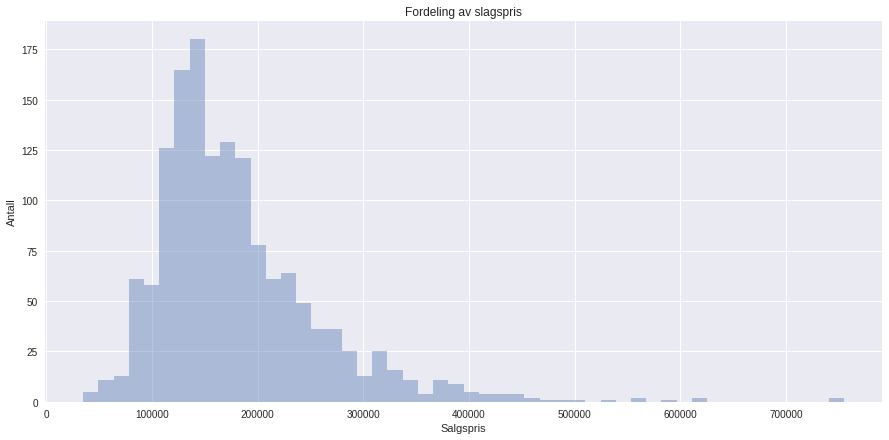

In [34]:
#Lab figur-objekt og bestem størrelsen
plt.figure(figsize=(15,7))

#Velg type plot med sns (seaborn) biblioteket.
sns.distplot(data['SalePrice'],bins=50, kde=False);

#X- og y-aksen kan navngis
plt.ylabel('Antall')
plt.xlabel('Salgspris')

#Sett tittel på figur
plt.title('Fordeling av slagspris')

Fordelingen kan også visualiseres med en tilpasset funksjon (kde) ved å sette kde til true og hist til false.

Text(0.5,1,'Fordeling av slagspris')

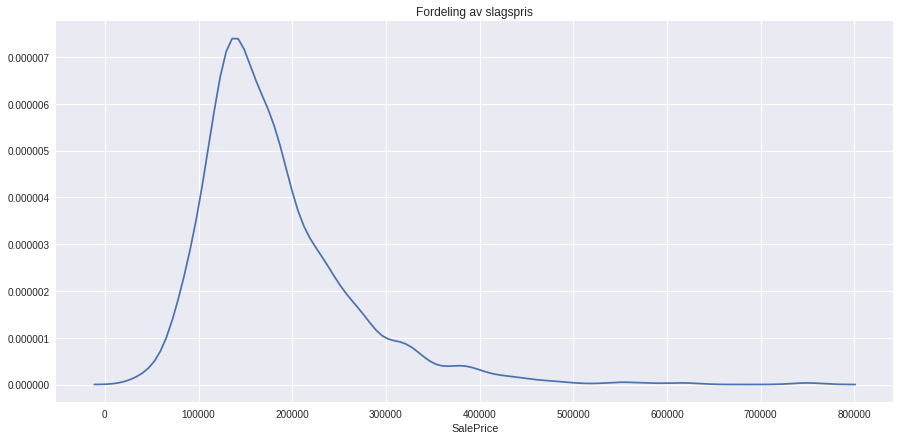

In [35]:
plt.figure(figsize=(15,7))

## Endrer kde til True
sns.distplot(data['SalePrice'],hist=False, kde=True);

plt.title('Fordeling av slagspris')

Kategorisk data kan vi visualisere ved å bruke countplots. For eksempel kan vi få en oversikt over hvor mange salg som ble gjort i de ulike årene.

Text(0.5,1,'Salg per år')

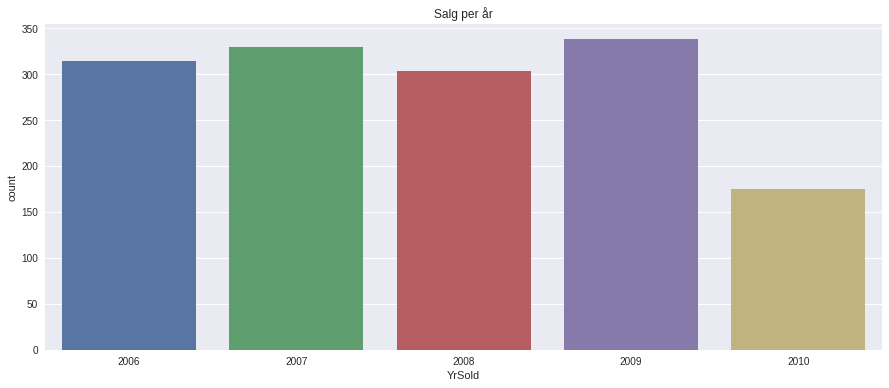

In [36]:
plt.figure(figsize=(15, 6))
sns.countplot(x='YrSold', data=data)
plt.title('Salg per år')

Man kan også gruppere inn countplots etter kategori, for eksempel kan vi fordele salg per år inn i måneder også.

Text(0.5,1,'Salg per år fordelt over måneder')

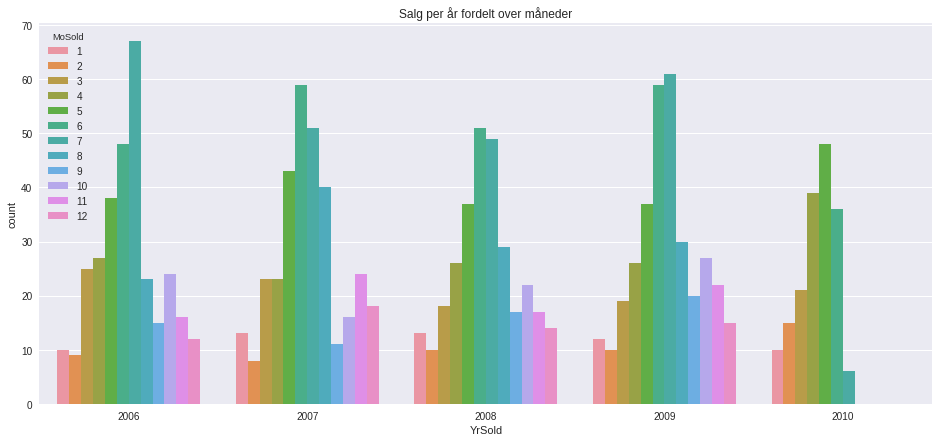

In [37]:
plt.figure(figsize=(16, 7))
sns.countplot(x='YrSold', hue='MoSold', data=data)
plt.title('Salg per år fordelt over måneder')

Plottet kan legges sidelengs ved å plotte dataen i y-retning istedenfor. Dette kan gjøre det enklere å tyde plottet.

Text(0.5,1,'Oversik over nabolag')

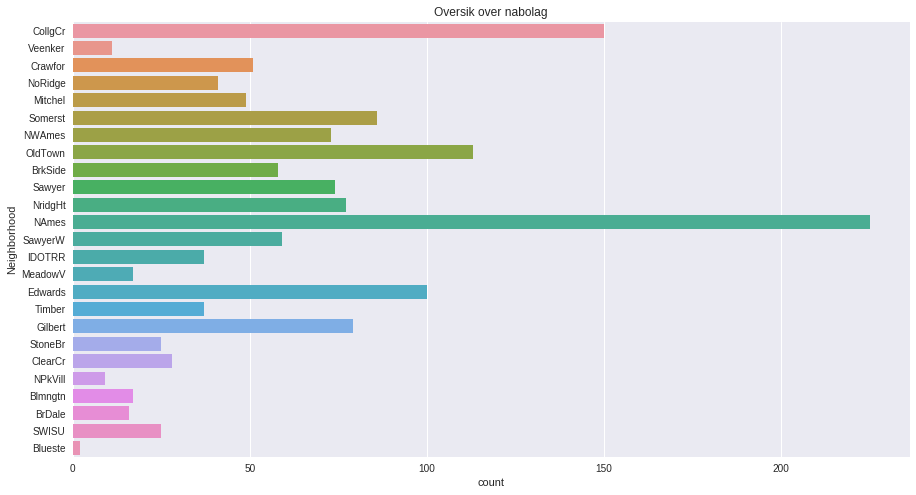

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Neighborhood', data=data)
plt.title('Oversik over nabolag')

Et scatter plot vil vise punktvis distribusjon over dataen. Her kan vi benytte plt sin scatter funksjon.

<br> $plt.scatter(x, y) $ <br>

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

Her kan vi for eksempel se at nyere bygg typisk går for en høyere pris. Ikke så overraskende

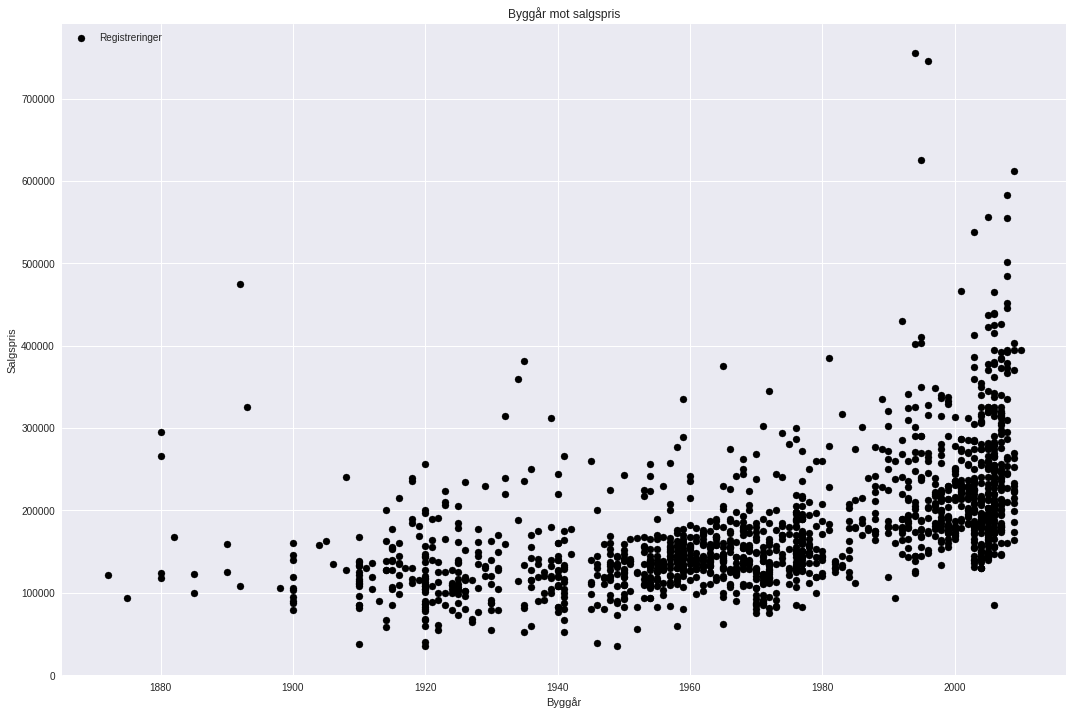

In [39]:
plt.figure(figsize=(18, 12))
plt.scatter(data['YearBuilt'], data['SalePrice'], color='black', label='Registreringer')
plt.ylabel('Salgspris')
plt.xlabel('Byggår')
plt.title('Byggår mot salgspris')
plt.legend(loc='upper left')
plt.show()

Vi kan også plotte samme punkter for ulike nabolag, og fargekode dem forskjellig. Et nabolag filtreres ut slik:

<br> $data\_OldTown = data[data['Neighborhood'] == 'OldTown'] $<br>

Deretter hentes byggår og salgspris ut som før

<br> $ data\_OldTown['YearBuilt"] $<br>

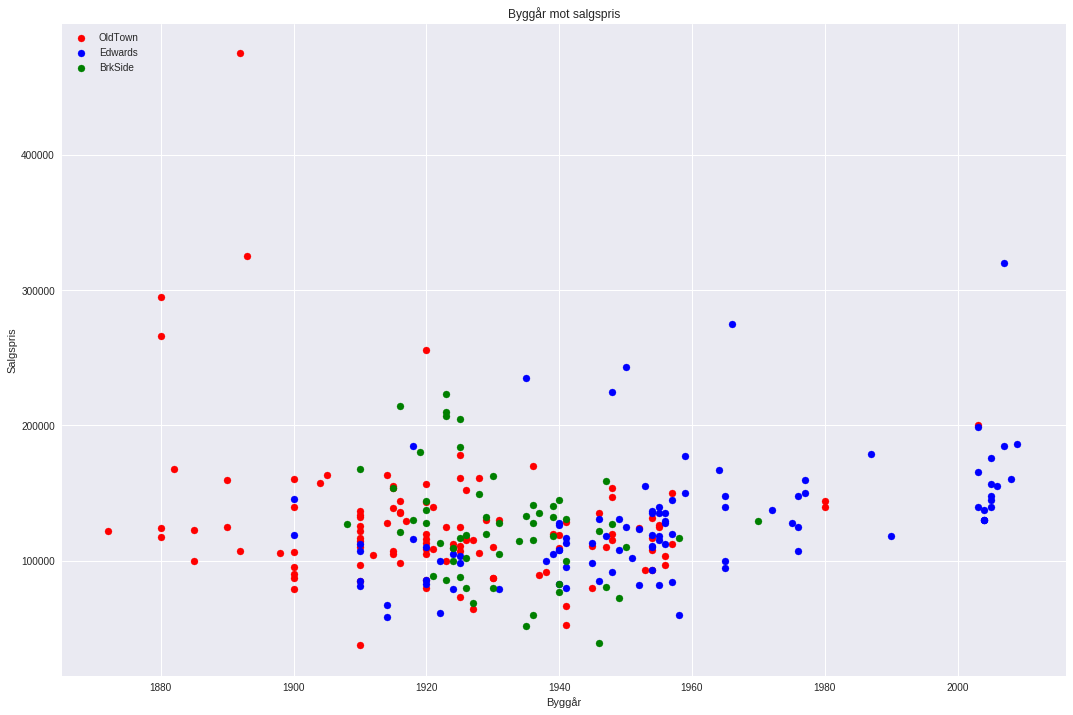

In [40]:
data_OldTown = data[data['Neighborhood'] == 'OldTown']

plt.figure(figsize=(18, 12))
plt.scatter(data_OldTown['YearBuilt'], data_OldTown['SalePrice'], color='red', label='OldTown')
plt.scatter(data[data['Neighborhood'] == 'Edwards']['YearBuilt'], data[data['Neighborhood'] == 'Edwards']['SalePrice'], color='blue', label='Edwards')
plt.scatter(data[data['Neighborhood'] == 'BrkSide']['YearBuilt'], data[data['Neighborhood'] == 'BrkSide']['SalePrice'], color='green', label='BrkSide')
plt.ylabel('Salgspris')
plt.xlabel('Byggår')
plt.title('Byggår mot salgspris')
plt.legend(loc='upper left')
plt.show()



##Korrelasjon

For å få innsikt i hvilken effekt featurene har på hverandre er det nyttig å se på korrelasjonen mellom dem. Et korrelasjonsplot mellom variabler viser hvor my to variabler endrer seg i takt med hverandre. Om en variabel korrelerer positivt med en annen variable, vil begge typisk stige på samme tidspunkt. Om to variabler korrelerer negativt, vil den ene variabelen synke når den andre stiger.


På korrelasjonsplottet under ser vi at det er perfekt korrelasjon langs diagonalen, noe som er naturlig siden alle variabler korrelerer perfekt med seg selv. Vi kan for eksempel se at OverallQual, som er generell kvalitet, korrelerer positivt med YearBuilt. Dette er logisk siden kvaliteten på nyere hus er typisk bedre enn på eldre hus.


Det mest interessante å studere her er korrelasjonen mellom salgspris og de andre featurene. Merk at OverallQual korrelerer sterkt positivt med SalePrice, heller ikke så overraskende.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]), <a list of 38 Text yticklabel objects>)

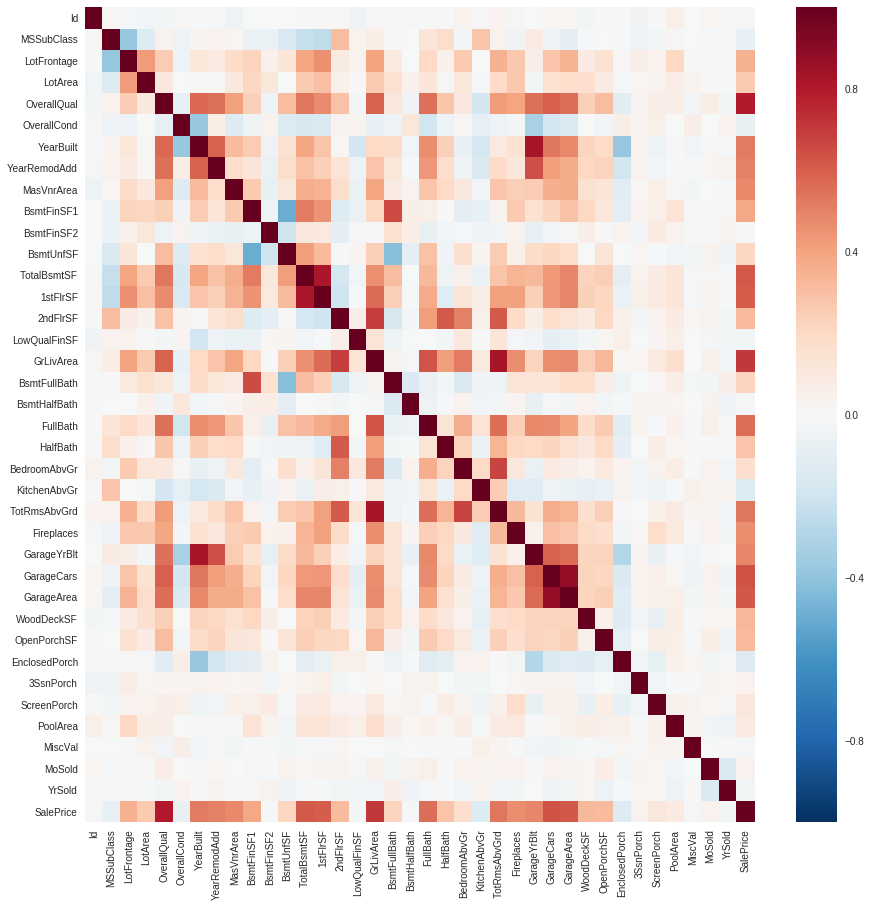

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = False, cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

## Uteliggere og ekstrempunkter

Et kjent problem med data når man skal bygge maskinlæringsmodeller ekstreme punkter. På plottet under kan du se eksempler på noen boliger som har ekstremt store tomter (kvf). For eksempel kan vi se en bolig på over 200000 kvf som er solgt for under 400000 dollar. Dette er en veldig unormalt lav pris for så mange kvf. Enten kan registreringen være feilaktig, det er kanskje en 0'er for mye, eller så er dette en gård som ligger langt unna. Selv om disse punktene kan være reelle, så er de så sjeldne og så ødeleggende at de er bedre å utelate.

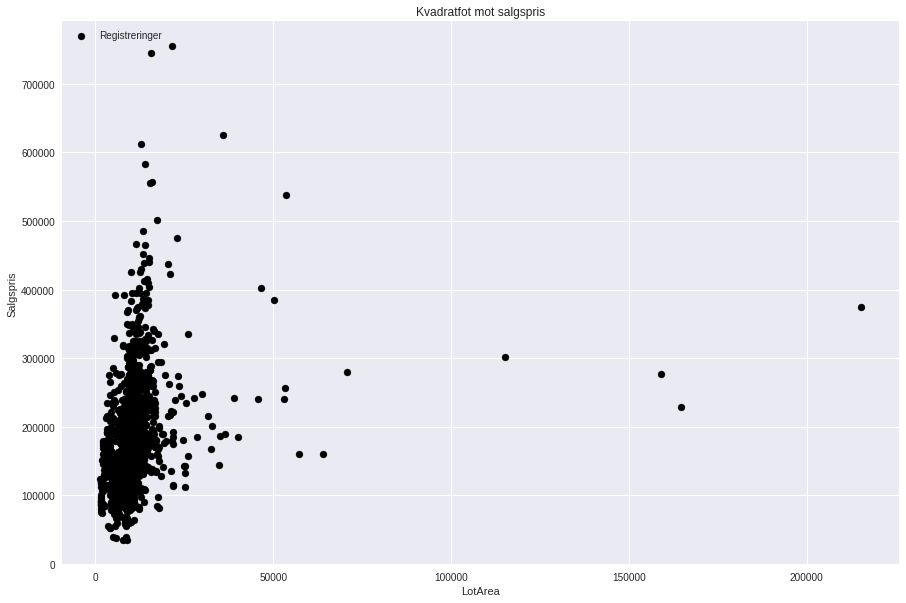

In [42]:
plt.figure(figsize=(15, 10))
plt.scatter(data['LotArea'], data['SalePrice'], color='black', label='Registreringer')
plt.ylabel('Salgspris')
plt.xlabel('LotArea')
plt.title('Kvadratfot mot salgspris')
plt.legend(loc='upper left')
plt.show()

In [0]:
#Alle registreringer med kvadratfot mindre enn 100000 eskluderes
data_kvf_uteneks = data[data['LotArea'] < 100000]

Etter at vi fjernet ekstrempunktene ser forholdet mellom kvadratfot og salgspris mindre forskjøvet ut. Dette vil lede til en mer stabil og generell modell.

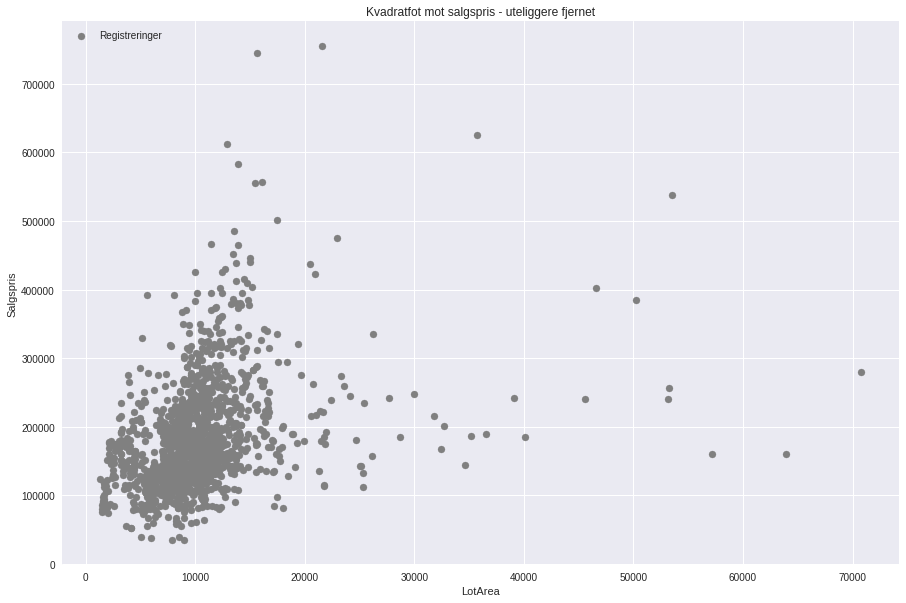

In [44]:
plt.figure(figsize=(15, 10))
plt.scatter(data_kvf_uteneks['LotArea'], data_kvf_uteneks['SalePrice'], color='grey', label='Registreringer')
plt.ylabel('Salgspris')
plt.xlabel('LotArea')
plt.title('Kvadratfot mot salgspris - uteliggere fjernet')
plt.legend(loc='upper left')
plt.show()

# Oppgave 1: Pandas og Matplotlib



## Bli bedre kjent med Pandas og Matplotlib

Disse oppgavene er ment for å bli bedre kjent med basis bibliotekene for preprosessering av data, og kan skippes hvis man er trygg på stoffet så langt.

#### Pandas
Finn og print følgende informasjon (tips: bruk describe()): 

 - Første og siste salg (måned og år)
 
 - Største svømmebasseng

#### Matplotlib
Visualiser rådata (tips: bruk info() til å studere attributter):

 - Kvadratfot på boligene (både med og uten ekstrempunkter)

 - Årstall boligene ble bygget

 - Hvor mange salg det er i hver måned totalt
 
 
#### Ekstra utfordringer
  
 - Finn gjennomsnittlig antall bad i nabolaget: OldTown
 
 - Visualiser de ulike salgs-forholdene i nabolagene
 
 - Finn og visulaiser den generelle kvaliteten (0 til 10) fordelt inn i generell tilstand. I hvor god tilstand er husene av ulik kvalitet? 

 - Plot forholdet mellom generell tilstand på huset og salgspris. Gjør dette gjerne med andre attributter, og vurder om du finner noen ekstrempunkter. 

In [45]:
"Skriv kode her"

'Skriv kode her'

## Konstruer nytt datasett

I denne oppgaven skal vi konstruere et nytt datasett tilpasset maskinlæring. 
- Velg ut features dere tenker er nyttige. 
- Bruk metodene vi har lært til å forstå attributtene i datasettet. 
- Kall det nye datasettet: $data\_modell$

Studer inneholdet i de kategoriske attributtene og hvordan den nummeriske dataen er fordelt. Vurder å fjerne ekstrempunkter og rader som skiller seg signifikant fra resten av settet. Det kan være til hjelp å lage et korrelasjonsplot til det nye datasettet.

<i>Får du dårlig tid kan modellen i løsningsforslaget under seksjonen "Konstruer nytt datasett" brukes. Husk å kjøre koden i løsningsforslaget for å generere datasettet. <i>

In [0]:
#Skriv kode her

# Løsningsforslag

## Bli bedre kjent med Pandas og Matplotlib

**Pandas**

In [47]:
beskrivelse_oppgave = data.describe()[['YrSold','MoSold','PoolArea']]
beskrivelse_oppgave

,YrSold,MoSold,PoolArea
count,1459.000000,1459.000000,1459.000000
mean,2007.815627,6.322824,2.760795
std,1.328542,2.704331,40.191018
min,2006.000000,1.000000,0.000000
25%,2007.000000,5.000000,0.000000
50%,2008.000000,6.000000,0.000000
75%,2009.000000,8.000000,0.000000
max,2010.000000,12.000000,738.000000


In [48]:
print('Første salg: {:.0f}/{:.0f} (mm/åååå)'.format(beskrivelse_oppgave.iloc[3,1],beskrivelse_oppgave.iloc[3,0]))
print('Siste salg: {:.0f}/{:.0f} (mm/åååå)'.format(beskrivelse_oppgave.iloc[7,1],beskrivelse_oppgave.iloc[7,0]))
print('Største svømmebasseng: {:.2f} kvf'.format(beskrivelse_oppgave.iloc[7,2]))

Første salg: 1/2006 (mm/åååå)
Siste salg: 12/2010 (mm/åååå)
Største svømmebasseng: 738.00 kvf


In [49]:
data_nabolag = data[data['Neighborhood'] == 'OldTown']
beskrivelse_OldTown = data_nabolag.describe()[['FullBath','HalfBath']]
beskrivelse_OldTown

,FullBath,HalfBath
count,113.000000,113.000000
mean,1.336283,0.176991
std,0.527978,0.383361
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,3.000000,1.000000


In [50]:
print('Gjennomsnittlig helbad: {:.2f} og halvbad: {:.2f} i OldTown'.format(beskrivelse_OldTown.iloc[1,0],beskrivelse_OldTown.iloc[1,1]))

Gjennomsnittlig helbad: 1.34 og halvbad: 0.18 i OldTown


**Matplotlib**

Text(0.5,1,'Fordeling av kvadratfot på boliger - med ekstremverdier')

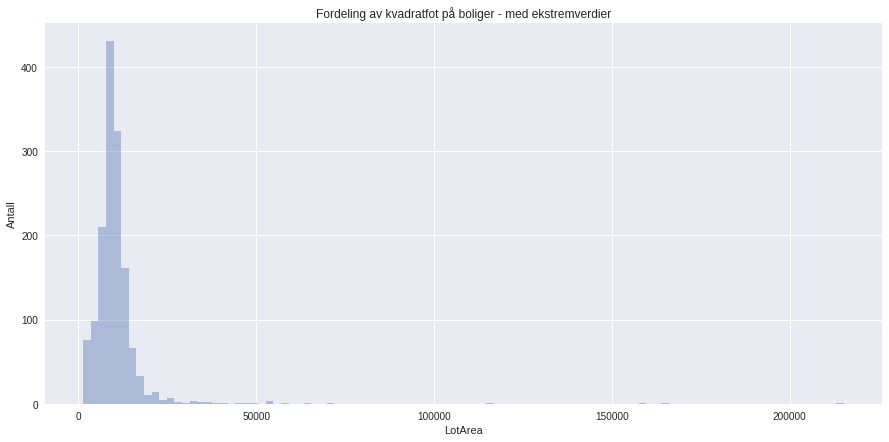

In [51]:
plt.figure(figsize=(15,7))
sns.distplot(data['LotArea'],bins=100, kde=False);
plt.ylabel('Antall')
plt.title('Fordeling av kvadratfot på boliger - med ekstremverdier')

Text(0.5,1,'Fordeling av kvadratfot på boliger - uten ekstremverdier')

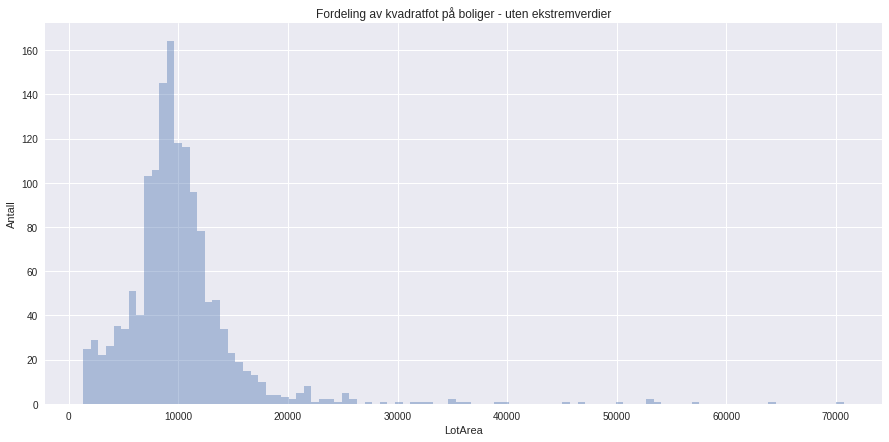

In [52]:
plt.figure(figsize=(15,7))
sns.distplot(data_kvf_uteneks['LotArea'],bins=100, kde=False);
plt.ylabel('Antall')
plt.title('Fordeling av kvadratfot på boliger - uten ekstremverdier')

Text(0.5,1,'Fordeling av år boligene ble bygget')

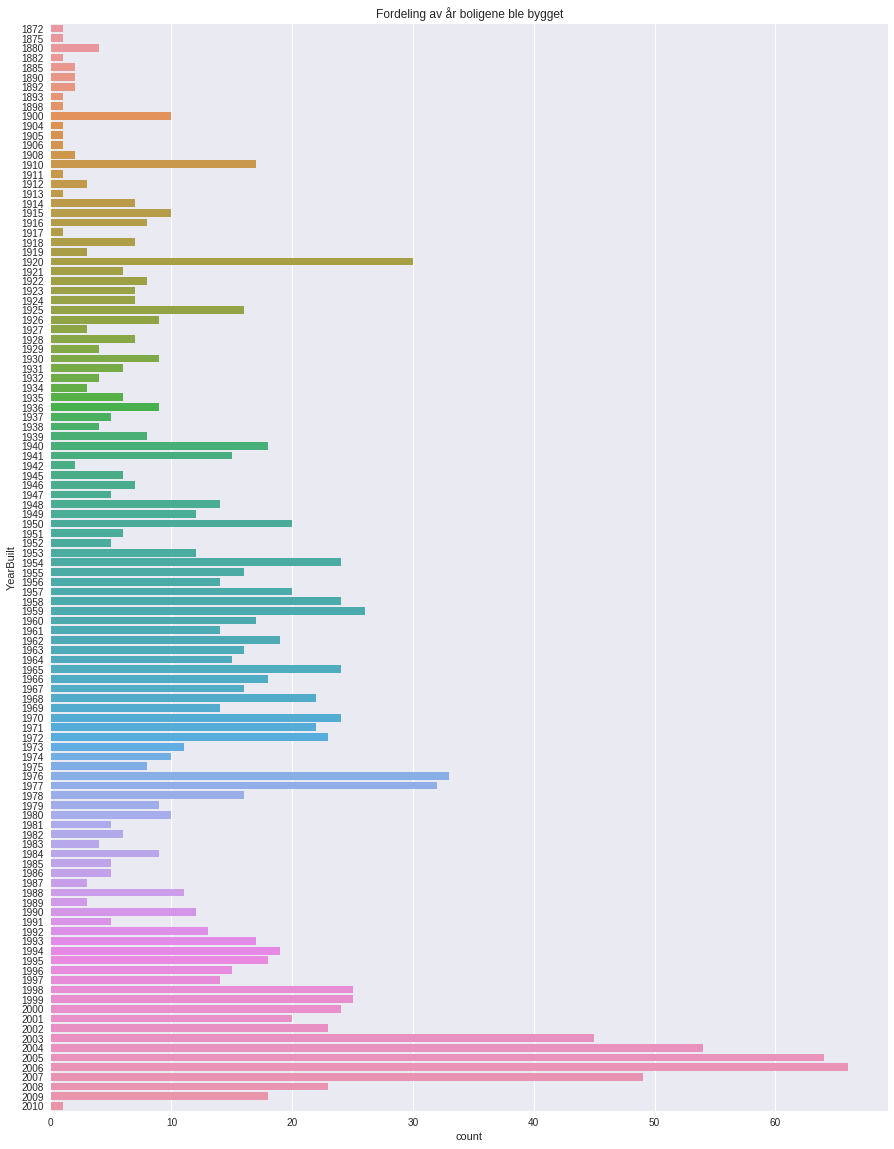

In [53]:
plt.figure(figsize=(15, 20))
sns.countplot(y='YearBuilt', data=data)
plt.title('Fordeling av år boligene ble bygget')

Text(0.5,1,'Salg per måned totalt')

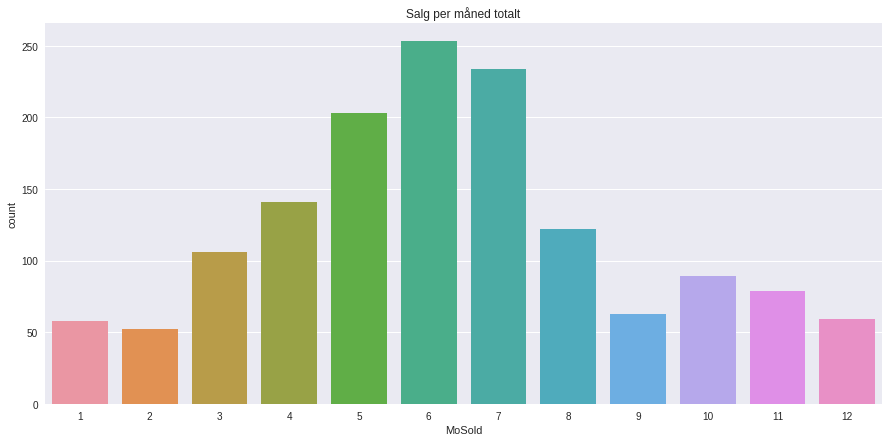

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(data['MoSold'])
plt.title('Salg per måned totalt')

Text(0.5,1,'Fordeling av salgs-forhold i nabolagene')

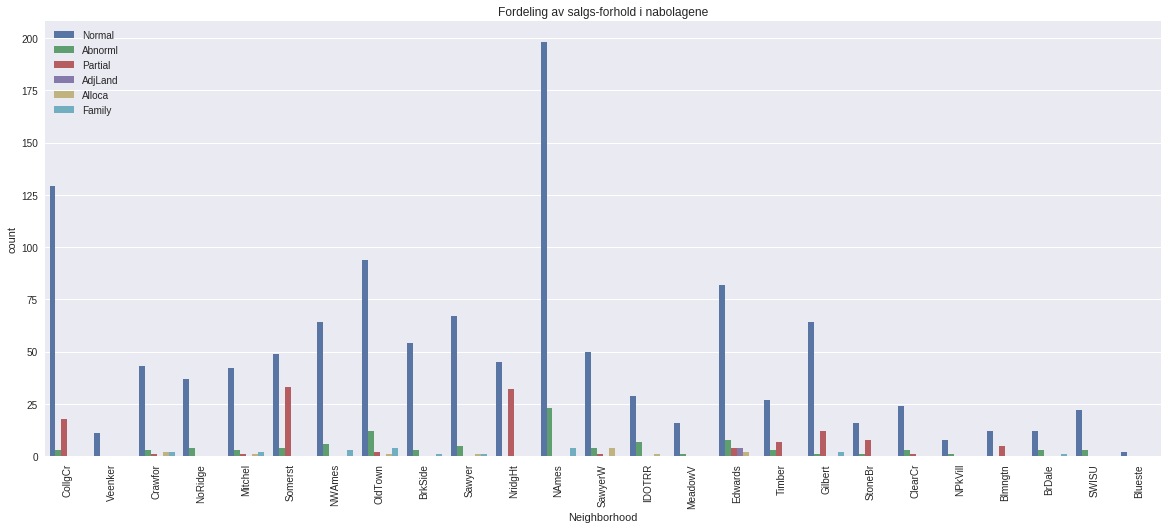

In [55]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'Neighborhood', hue = 'SaleCondition', data=data)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title('Fordeling av salgs-forhold i nabolagene')

Text(0.5,1,'Fordeling av salgs-forhold i nabolagene')

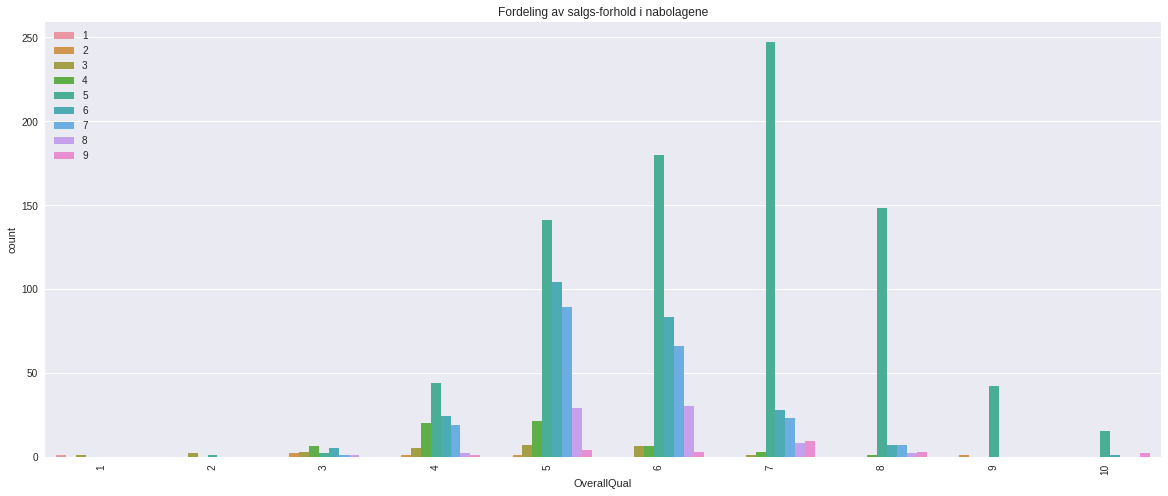

In [56]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'OverallQual', hue = 'OverallCond', data=data)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title('Fordeling av salgs-forhold i nabolagene')

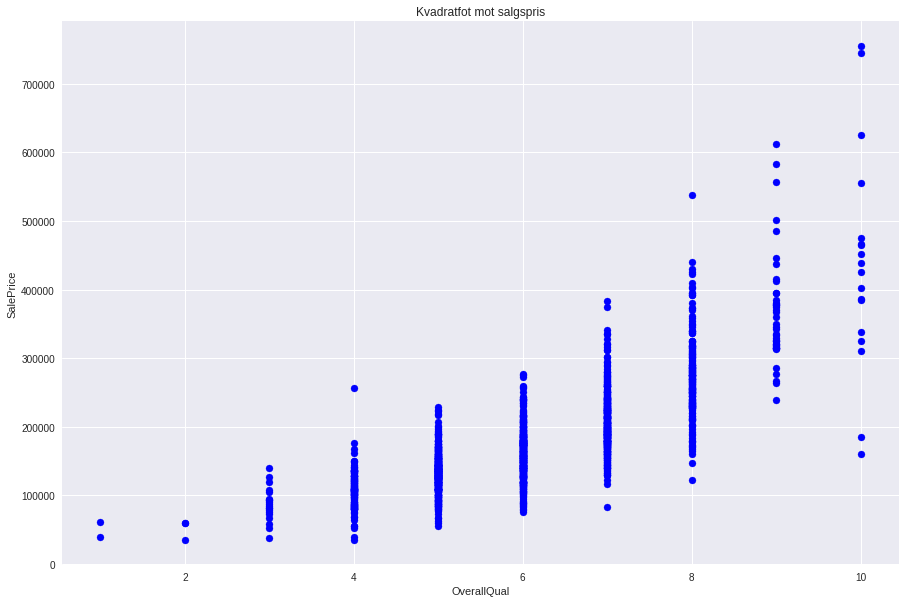

In [57]:
plt.figure(figsize=(15, 10))
plt.scatter(data['OverallQual'], data['SalePrice'], color='blue', label='Registreringer')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Kvadratfot mot salgspris')
plt.show()

## Konstruer nytt datasett

In [58]:
# Velger kolonnene man ønsker i det nye datasettet
aktuelle_kolonner = ['LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','Fence','KitchenAbvGr','TotRmsAbvGrd','GarageCars','Fireplaces','PoolArea','PoolQC','MoSold','YrSold']
data_modell = data[aktuelle_kolonner]

# Eksempel på generering av ny kolonne
data_modell['HouseAge'] = data['YrSold'] - data['YearBuilt']

#Fence NaN endret til None
data_modell['Fence'] = data_modell['Fence'].fillna('None')

#Salgspris legges til på slutten
data_modell['SalePrice'] = data['SalePrice']

#Ekstrempunkter mht kvadratfot fjernet
data_modell = data_modell[data['LotArea'] < 100000]

#Skriver ut de 5 første radene
data_modell.head()

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,2,1,3,None,1,8,2,0,0,None,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,2,0,3,None,1,6,2,1,0,None,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,2,1,3,None,1,6,2,1,0,None,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,1,0,3,None,1,7,3,1,0,None,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,2,1,4,None,1,9,3,1,0,None,12,2008,8,250000


In [59]:
data_modell.describe()

,LotArea,WoodDeckSF,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,10096.756014,93.778007,6.099656,5.575258,1971.261856,1984.851546,1161.345704,1.563574,0.383505,2.865979,1.046735,6.516838,1.766323,0.609622,2.768385,6.322337,2007.815808,36.553952,180614.773883
std,5650.746194,124.367321,1.384367,1.113722,30.238179,20.647262,385.777640,0.551271,0.503088,0.816300,0.220700,1.627087,0.748474,0.641453,40.246002,2.707652,1.329652,30.285704,79301.151609
min,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,34900.000000
25%,7537.500000,0.000000,5.000000,5.000000,1954.000000,1967.000000,882.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,129900.000000
50%,9464.000000,0.000000,6.000000,5.000000,1973.000000,1994.000000,1086.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,1.000000,0.000000,6.000000,2008.000000,35.000000,162900.000000
75%,11592.000000,168.000000,7.000000,6.000000,2000.000000,2004.000000,1389.500000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000,8.000000,2009.000000,54.000000,213500.000000
max,70761.000000,857.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,3.000000,738.000000,12.000000,2010.000000,136.000000,755000.000000


In [60]:
data_modell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 24 columns):
LotArea         1455 non-null int64
Neighborhood    1455 non-null object
WoodDeckSF      1455 non-null int64
Condition1      1455 non-null object
HouseStyle      1455 non-null object
OverallQual     1455 non-null int64
OverallCond     1455 non-null int64
YearBuilt       1455 non-null int64
YearRemodAdd    1455 non-null int64
1stFlrSF        1455 non-null int64
FullBath        1455 non-null int64
HalfBath        1455 non-null int64
BedroomAbvGr    1455 non-null int64
Fence           1455 non-null object
KitchenAbvGr    1455 non-null int64
TotRmsAbvGrd    1455 non-null int64
GarageCars      1455 non-null int64
Fireplaces      1455 non-null int64
PoolArea        1455 non-null int64
PoolQC          1455 non-null object
MoSold          1455 non-null int64
YrSold          1455 non-null int64
HouseAge        1455 non-null int64
SalePrice       1455 non-null int64
dtypes: int64(19), objec

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text yticklabel objects>)

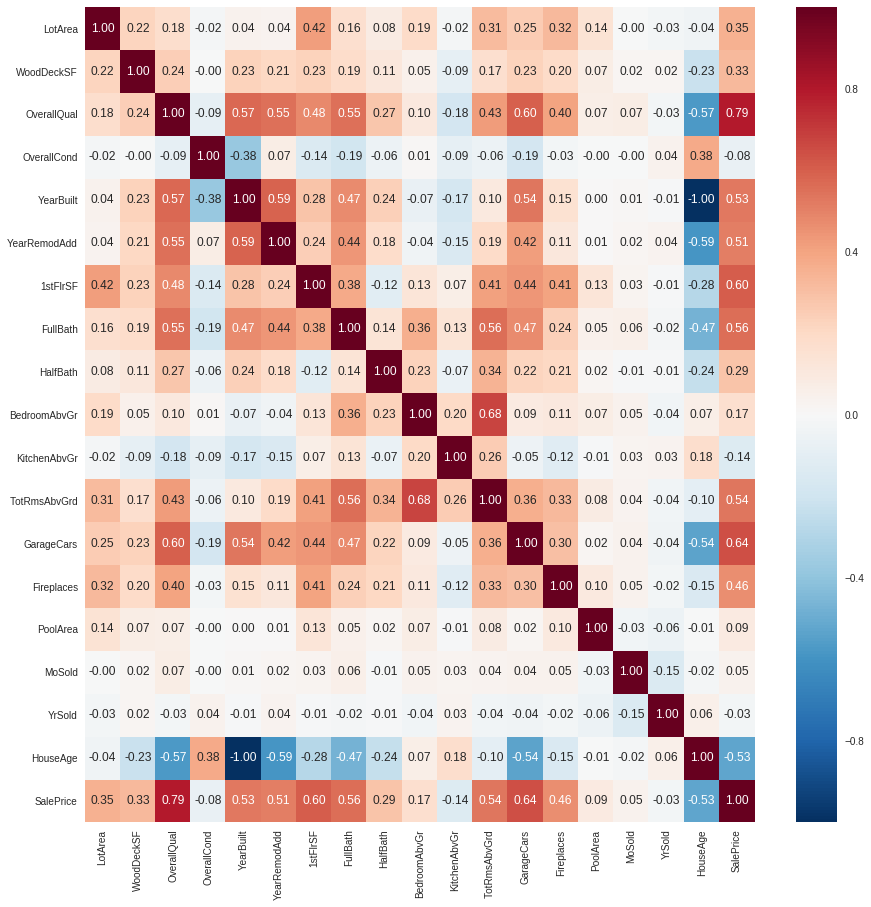

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(data_modell.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

#Maskinlæring med Scikit-Learn (Sklearn)

## Dataforbredelser til maskinlæringsmodellene

### Input og output data

Nå ønsker vi å lage maskinlæringsmodeller som bruker datasettet vi har laget til å predikere salgsprisen på boliger. Den estimerte salgsprisen er basert på attributtene vi inkluderte i dette datasettet. Input til modellen vil da være disse utvalgte attributtene, og outputen vil være salgspris. Inputen og outputen deler vi opp i to ulike Pandas objekter. 
<br>

Data kan aksesseres i pandas objekter ved å bruke index istedenfør kolonnenavn. Til input objektet, *input_data*, vil vi hente ut alle kolonner bortsett fra den siste, som er salgspris. Til output objecktet, *output_data*, vil vi hente ut kun siste kolonne, salgsprisen.
<br>

I python betyr index ':' alle, så row = : betyr alle raderne. Index '0:-1' betyre fra og med 0 til (og ikke med) element (-1), som i python betyr nest siste. Om du indexerer negativt i python, starter du i enden av listen.

In [62]:
#Velg alle kolonner untatt den siste. Denne inneholder Salgsprisen som vi ønsker å predikere
input_data = data_modell.iloc[:,0:-1]

#Velg kun siste kolonne. Dette er salgsprisen
output_data = data_modell['SalePrice']

print('Antall registreringer i dataen: {}, antall attributter i input: {}'.format(input_data.shape[0],input_data.shape[1]))

Antall registreringer i dataen: 1455, antall attributter i input: 23


In [63]:
input_data.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,2,1,3,None,1,8,2,0,0,None,2,2008,5
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,2,0,3,None,1,6,2,1,0,None,5,2007,31
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,2,1,3,None,1,6,2,1,0,None,9,2008,7
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,1,0,3,None,1,7,3,1,0,None,2,2006,91
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,2,1,4,None,1,9,3,1,0,None,12,2008,8


In [64]:
output_data.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### kategoriske attributter

Maskinlæringsmodeller aksepterer kun tallverdier. Derfor er det ikke mulig å servere den kategoriske verdier som "Neighborhood", som er en string eller tekst verdi. Vi må derfor konvertere all kategorisk input til tallverdier. Et enkelt eksempel er å se på "Street" featuren, som kun har to kategorier.

In [65]:
data["Street"].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

Denne attributten forteller at oppkjørselen til et hus er enten av asfalt eller grus. Disse kategoriene kan oversettes til [0 , 1] istedenfor ['Pvae' , 'Grvl'] slik at de blir lesbare for modellene våre. Dette må gjøres med alle kategoriske verdier i datasettet vi skal bruke. Scikit-learn har funksjoner som gjør dette enkelt. Les mer om <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html" >LabelEncoder </a> i Scikit-learn biblioteket. 


In [104]:
from sklearn import preprocessing

## Oppretter encodere for de ulike kategoriene vi ønsker å transformere fra tekst til tall.
Neighborhood_enc = preprocessing.LabelEncoder()
Condition1_enc = preprocessing.LabelEncoder()
HouseStyle_enc = preprocessing.LabelEncoder()
Fence_enc = preprocessing.LabelEncoder()
PoolQualityCondition_enc = preprocessing.LabelEncoder()

## Konverterer kolonnene som inneholder tekstverdier til tallverdier
input_data['Neighborhood'] = Neighborhood_enc.fit_transform(input_data['Neighborhood'])
input_data['Condition1'] = Condition1_enc.fit_transform(input_data['Condition1'])
input_data['HouseStyle'] = HouseStyle_enc.fit_transform(input_data['HouseStyle'])
input_data['Fence'] = Fence_enc.fit_transform(input_data['Fence'])
input_data['PoolQC'] = PoolQualityCondition_enc.fit_transform(input_data['PoolQC'])

## Sjekker at kolonnene med kategoriske features har fått tallverdier
input_data.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge
0,8450,5,0,2,5,7,5,2003,2003,856,2,1,3,4,1,8,2,0,0,3,2,2008,5
1,9600,24,298,1,2,6,8,1976,1976,1262,2,0,3,4,1,6,2,1,0,3,5,2007,31
2,11250,5,0,2,5,7,5,2001,2002,920,2,1,3,4,1,6,2,1,0,3,9,2008,7
3,9550,6,0,2,5,7,5,1915,1970,961,1,0,3,4,1,7,3,1,0,3,2,2006,91
4,14260,15,192,2,5,8,5,2000,2000,1145,2,1,4,4,1,9,3,1,0,3,12,2008,8


Til sammenlikning kan vi sjekke dataen uten LabelEncoding for å se hvordan attributtene ble enkodet

In [67]:
data_modell.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,Fence,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,PoolQC,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,2,1,3,None,1,8,2,0,0,None,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,2,0,3,None,1,6,2,1,0,None,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,2,1,3,None,1,6,2,1,0,None,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,1,0,3,None,1,7,3,1,0,None,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,2,1,4,None,1,9,3,1,0,None,12,2008,8,250000


### Treningsdata og testdata

For å validere treffsikkerheten til maskinlæringsmodellene våre må vi fordele dataen inn i treningsdata og testdata. Prinsippet er at vi henter ut en andel av registreringene våre, for eksempel 20%, og gjemmer dem bort når vi konstruerer modellene. Når vi har designet en eller flere modeller gjøres en endelig validering ved å bruke testdataen. Når vi splitter dataen i trenings- og testdata plukker vi ut tilfeldige registreringer i datasettet. Vi bruker en hjelpefunksjon fra Scikit-learn, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" > train_test_split </a>, til å gjøre dette:


<br> $ X\_trening, X\_test, Y\_trening, Y\_test = train\_test\_split(X, Y, test\_sett\_andel) $ <br>


Her har jeg også satt random_state = 1, noe som gjør at datasettet blir tilfeldig delt inn i trenings- og testdata på samme måte hver gang scriptet kjøres. Slik kan resultatene enklere sammenliknes mellom modellene hvis man tester modeller i flere runder.


In [68]:
from sklearn.model_selection import train_test_split

#Dataen deles opp i to sett: treningssett og testsett og lagres i de 4 nye objektene. Test_size bestemmer andelen av dataen som blir brukt til testing av modellen
input_treningsdata, input_testdata, output_treningsdata, output_testdata = train_test_split(input_data, output_data, test_size=0.2, random_state=1)

print('Input_treningsdata: {}, input_testdata: {}, output_treningsdata: {} og output_testdata: {}'.format(input_treningsdata.shape, input_testdata.shape, output_treningsdata.shape, output_testdata.shape))


Input_treningsdata: (1164, 23), input_testdata: (291, 23), output_treningsdata: (1164,) og output_testdata: (291,)


In [69]:
input_treningsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 1152 to 1065
Data columns (total 23 columns):
LotArea         1164 non-null int64
Neighborhood    1164 non-null int64
WoodDeckSF      1164 non-null int64
Condition1      1164 non-null int64
HouseStyle      1164 non-null int64
OverallQual     1164 non-null int64
OverallCond     1164 non-null int64
YearBuilt       1164 non-null int64
YearRemodAdd    1164 non-null int64
1stFlrSF        1164 non-null int64
FullBath        1164 non-null int64
HalfBath        1164 non-null int64
BedroomAbvGr    1164 non-null int64
Fence           1164 non-null int64
KitchenAbvGr    1164 non-null int64
TotRmsAbvGrd    1164 non-null int64
GarageCars      1164 non-null int64
Fireplaces      1164 non-null int64
PoolArea        1164 non-null int64
PoolQC          1164 non-null int64
MoSold          1164 non-null int64
YrSold          1164 non-null int64
HouseAge        1164 non-null int64
dtypes: int64(23)
memory usage: 218.2 KB


In [70]:
input_testdata.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 1378 to 1249
Data columns (total 23 columns):
LotArea         291 non-null int64
Neighborhood    291 non-null int64
WoodDeckSF      291 non-null int64
Condition1      291 non-null int64
HouseStyle      291 non-null int64
OverallQual     291 non-null int64
OverallCond     291 non-null int64
YearBuilt       291 non-null int64
YearRemodAdd    291 non-null int64
1stFlrSF        291 non-null int64
FullBath        291 non-null int64
HalfBath        291 non-null int64
BedroomAbvGr    291 non-null int64
Fence           291 non-null int64
KitchenAbvGr    291 non-null int64
TotRmsAbvGrd    291 non-null int64
GarageCars      291 non-null int64
Fireplaces      291 non-null int64
PoolArea        291 non-null int64
PoolQC          291 non-null int64
MoSold          291 non-null int64
YrSold          291 non-null int64
HouseAge        291 non-null int64
dtypes: int64(23)
memory usage: 54.6 KB


### Feilmåling av prediksjoner

Når vi evaluerer en maskinlæringsmodell må vi bestemme oss for hvordan vi måler feilen mellom reell salgspris og estimert salgspris. Gjennomsnittet av absolutt feil er en simpel og oversiktlig måte å beregne feilprediksjoner på. Heldigvis slipper vi å regne ut dette selv da Scikit-learn har ferdigbygde metoder for dette. For å få til dette må vi  kalle $mean\_absolute\_error()$.  Metoden må gis to parametre; $salgspris\_prediksjoner$ og $salgspris\_fra\_testdata$. På den måten kan gjennomsnittlig absloutt feil regnes ut og lagres i en $MAE$ variabel <p>

In [0]:
## Importerer metode for å måle gjennomsnittlig absolutt feil
from sklearn.metrics import mean_absolute_error

##Lineær regresjon

Linær regresjon er modell der man forsøker å tilpasse en rett linje til data. Målet er å minimere den totale avstanden fra datapunktene til linjen. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Linear_regression">Linear regression</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" >Scikit-learn dokumentasjon</a>

<p>
  ###  Trene lineær modell
  For å trene en modell basert på lineær regresjon må man importere riktig modell fra Scikit-learn. Deretter må man lage et objekt som representerer modellen. Dette kan gjøres ved å skrive: <br>
  
 $modell\_lineær = LinearRegression()$ <br>
  
  Når modell-objektet er opprettet må man kalle objektets metode $fit()$. Denne metoden tar to parametere; attributtene og tilhørende output, eller X og Y. I vårt tilfelle er attributtene utvalgte kolonner som beskriver huset, mens output er salgsprisen. For å trene modellen til dette datasette skriver man derfor: <br>
  
  $modell\_lineær.fit(input\_treningsdata, output\_treningsdata)$ <br>
  
 Den lærte sammenhengen mellom husets egenskaper og salgspris er nå lagret i modellen. 
  
<p/>

In [72]:
#Treningsfase
from sklearn.linear_model import LinearRegression

#Regressjons-objekt fra scikit-learn
modell_lineær = LinearRegression()

#Tilpass regressjonskoeffesienter med treningsdata
modell_lineær.fit(input_treningsdata, output_treningsdata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Predikere salgspris med lineær modell** <br>
Den lærte modellen kan nå brukes til å predikere salgspriser på hus. Det eneste modellen krever er de samme attributtene den ble trent på. Siden vi har spart endel data som modellen ikke har sett før, kan man måle hvor nøyaktig modellen er til å predikere salgspris på "nye" hus. Dette kan gjøres ved å kalle <br>
$modell\_lineær.predict()$. <br>

Metoden $predict()$ tar en parameter; $input\_testdata$. Dette er dataene som vi har reservert for testing av modellen.  Resultatet av prediksjonen lagrer vi i $pris\_prediksjoner\_lineær$<br>
<p>



In [73]:
#Testfase

#Gjør pris-prediksjon på testdataen. 
pris_prediksjoner_lineær = modell_lineær.predict(input_testdata)

#Beregn feil
MAE_lin = mean_absolute_error(pris_prediksjoner_lineær, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_lin))

MAE: 25576.51696898981


Her benytter vi plt (kallenavnet for matplotlib) sin plottefunksjon for å lage et punktplot
<br> $plt.scatter(x, y) $ <br>

Her plotter vi altså predikert pris mot ekte pris, optimalt hadde disse ligget langs en rett linje. Da hadde modellen vært 100% treffsikker.

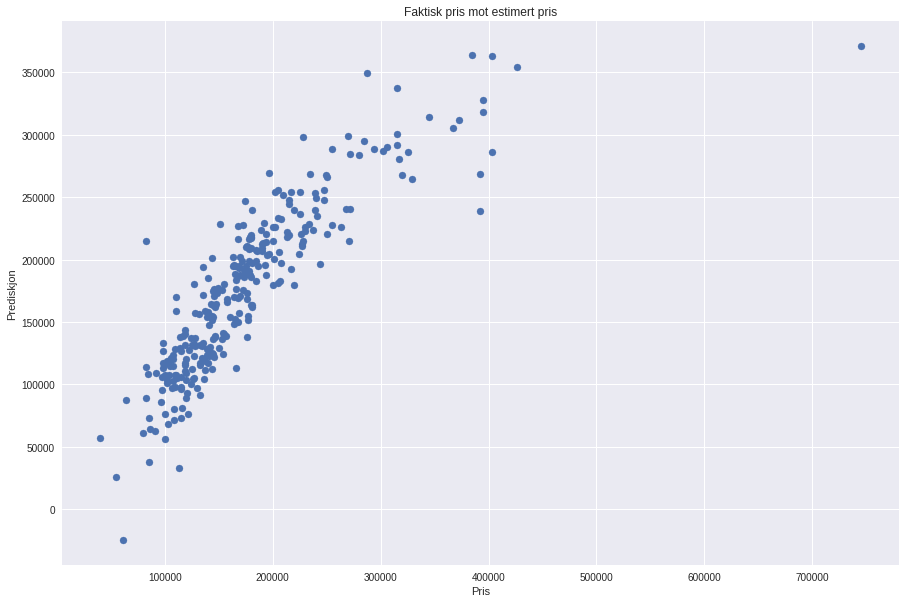

In [74]:
plt.figure(figsize=(15, 10))
plt.scatter(x=output_testdata, y=pris_prediksjoner_lineær)
plt.xlabel('Pris')
plt.ylabel('Prediskjon')
plt.title('Faktisk pris mot estimert pris')
plt.show()

## Decision tree regression

Decision trees baserer seg på å forsøke å dele datasettet i undergrupper. Ved å bevege seg gjennom treet kan et data klassifiseres. Decision trees kan også brukes til regresjon. 


---



**Overlevde Titanic?:**



<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">Decision tree</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">Scikit-learn dokumentasjon</a>

<p>
  ### Trene Decision tree 
 På samme måte som tidligere må man importere riktig modell fra Scikit-learn. Vi skal ha $DecisionTreeRegressor$. Deretter må modellen lages ved å skrive. <br>
 $model\_tre = DecisionTreeRegresseor()$ <br>
  
  Vi trener modellen på samme vis <br>
  $model\_tre.fit(input\_treningsdata, output\_treningsdata)$ <br>
Sammenhengen er nå lagret i modell-objektet. 
  
<p/>

In [75]:
## Importerer DecisionTreeRegressor fra sklearn
from sklearn.tree import DecisionTreeRegressor

## Oppretter modell
modell_tre = DecisionTreeRegressor()

## Trener modell med features og labels. 
modell_tre.fit(input_treningsdata, output_treningsdata)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:

pris_prediksjon_tre = modell_tre.predict(input_testdata)

MAE_tre = mean_absolute_error(pris_prediksjon_tre, output_testdata)

print("MAE: {}".format(MAE_tre))

MAE: 27077.288659793816


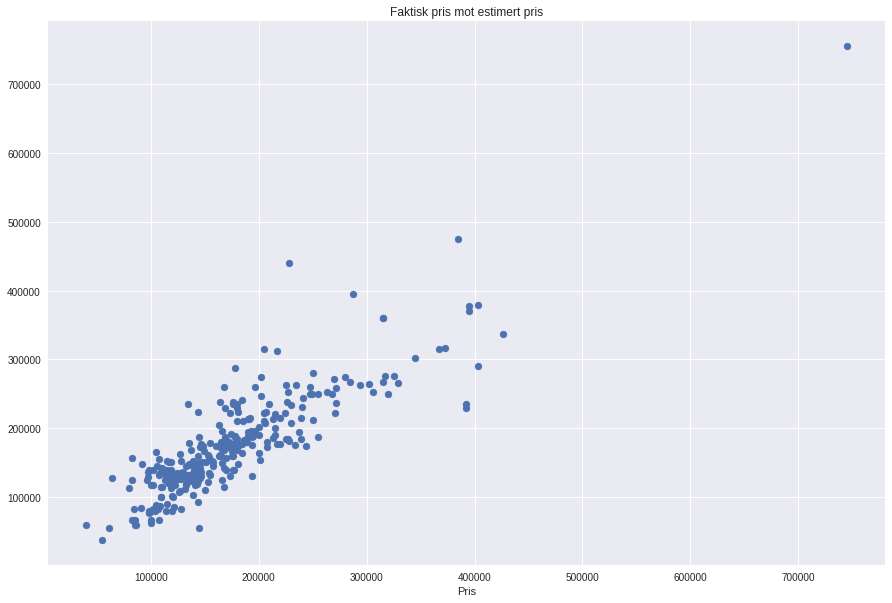

In [77]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_tre)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Skog regressjon
Skogmodeller tar utgangspunkt i Decision trees. Istedenfor å generere et tre, så kan skogmodeller generere mange trær. Et valgtre kan se forskjellig ut for samme datasett mellom hver gang det genereres, så mange ulike trær kan i samspill lage en mer robust prediksjon enn et eneste valgtre. Trærne i skogen "stemmer over"/"enes om" riktig resultat.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Random_forest">Skogregresjon</a> <br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Scikit-learn dokumentasjon</a>

In [78]:
#Forest regression

from sklearn.ensemble import RandomForestRegressor

modell_skog = RandomForestRegressor(random_state=1)

modell_skog.fit(input_treningsdata, output_treningsdata)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [79]:
pris_prediksjon_skog = modell_skog.predict(input_testdata)

MAE_skog = mean_absolute_error(pris_prediksjon_skog, output_testdata)

print("MAE: {}".format(MAE_skog))

MAE: 20273.798969072166


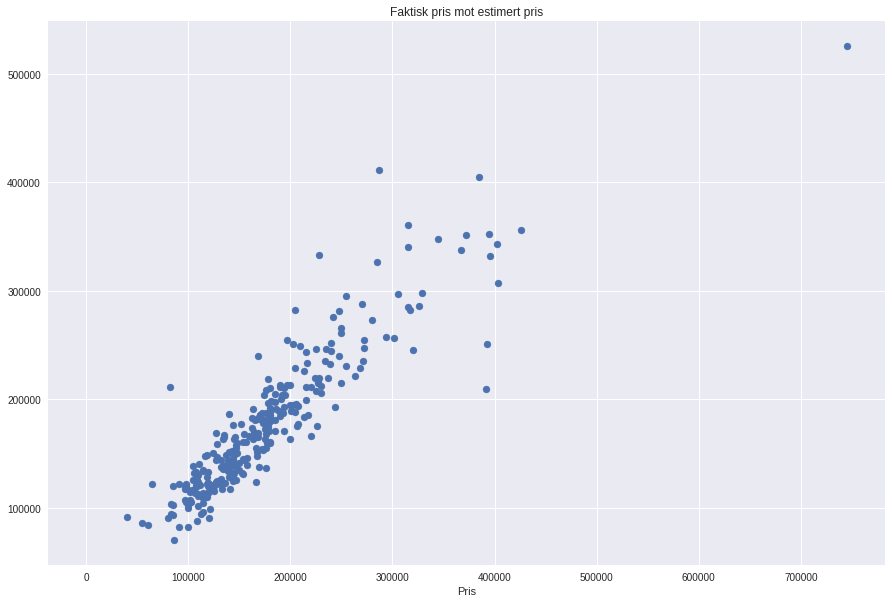

In [80]:
plt.figure(figsize=(15, 10))
plt.plot([0,0],[400000,400000],'k-',linestyle='solid')

plt.scatter(output_testdata, pris_prediksjon_skog)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Nevralt nettverk regressjon

Nevrale nettverk er kjent for å være en god regresjonsmetode når dataen er kompleks og stor. Det er ikke nødvendigvis bedre enn de mer klassiske maskinlæringsmodellene og krever  mer tilpassing av parametere. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">nevrale nettverk</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">Scikit-learn dokumentasjon</a>

Noen viktige parametere å tenke på er:

 - Hidden_layer_sizes: Antall gjemte lag i nettverket, og antall noder i disse lagene. Det i-ende elementet er antall noder i det i-ende laget. (#noder i lag 1, #noder i lag 2, ... , #noder i lag n)
 - Learning_rate_init: hastigheten på læringen. For hurtig læring gjør at nettverket lærer hurtig og aggressivt, og lærer muligens litt for generaliserte løsninger. For sakte gjør at nettverket aldri når de gode løsningene og generaliserer muligens ikke nok.
 - Max_iter: Maximalt antall treningsiterasjoner over hele datasettet. Hvis max_iter er for liten rekker ikke nettverket å trene ferdig. Hvis den er for stor kan nettverke ende med å trene unødvendig mye, som til og med kan lede til for lite generalisering.
 - Validation_fraction: Andel av input dataen som vil bli brukt til underveis-validering mellom hver trenings iterasjon. 15% pleier å være et bra valg.


En grei huskeregel er at jo mer kompleks dataen er, jo mer komplekst burde nettverket være. Ofte er det lurt å begynne med et enkelt og lite nettverk, for eksempel to lage med 50 noder, og så utvide nettverket gradvis mens du følger med å feilmålingen. Learning rate kan justeres på samme måte, begynn med en lav rate og øk den gradvis.

In [81]:
from sklearn.neural_network import MLPRegressor

modell_MLPR = MLPRegressor(hidden_layer_sizes=(200,100,20), activation='relu',solver='adam', max_iter=300, learning_rate_init=0.01, momentum = 0.9, validation_fraction = 0.2)

modell_MLPR.fit(input_treningsdata, output_treningsdata)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 100, 20), learning_rate='constant',
       learning_rate_init=0.01, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

In [82]:
pris_prediksjon_MLPR = modell_MLPR.predict(input_testdata)

MAE_MLPR = mean_absolute_error(pris_prediksjon_MLPR, output_testdata)

print("MAE: {}".format(MAE_MLPR))

MAE: 45265.90313229578


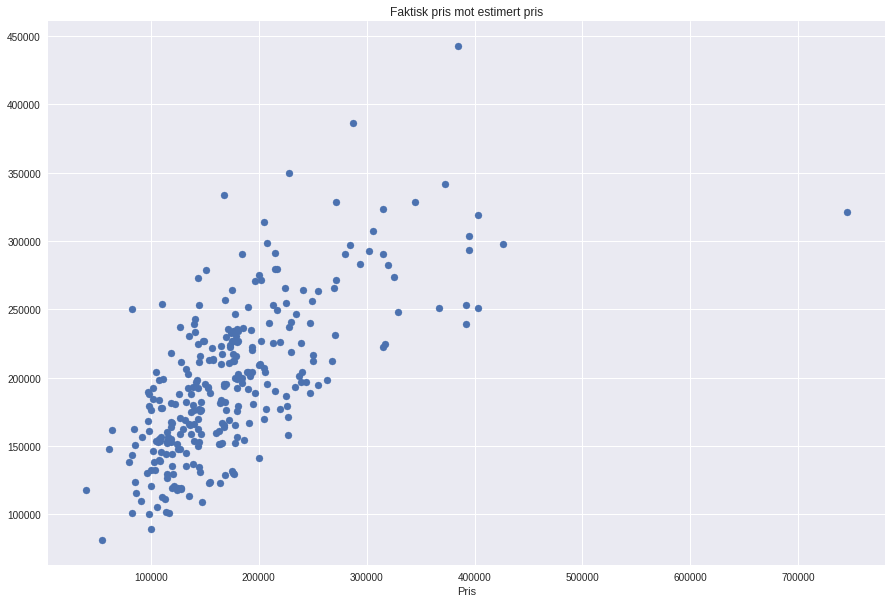

In [83]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_MLPR)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

## Gradient boosted regression

Gradient boosting har samme prinsipp som forest regression, det er flere modeller som i samarbeid lager en prediksjon. I forest regression modellen konstrueres mange uavhengige og ulike valgtre-modeller som utfører hver sin prediksjon. Alle disse prediksjonene blir til slutt slått sammen til den endelige prediksjonen ved for eksempel å ta gjennomsnittet av alle prediksjonene. I gradient boosting lages det også mange forskjellige valgtre-modeller, men disse lages sekvensielt, og er avhengige av hverandre. 


Prinsippet er at når første valgtre blir laget, så blir neste valgtre laget basert på feilen til den første modellen. En liten bit av treningsdataen, valideringsdata, blir brukt til å gjøre en underveis-vurdering på samme måte som testdataen. Målet for neste tre er å minimere feilen til det forrige treet. Altså stepper neste modell inn for å rette opp det forrige modell gjorde det dårligst på. Dette kan gjøres evig, men i realiteten må vi sette en grense på hvor mange valgtrær man tillater modellen å lage. Prinsippet er forklart i mer detalj <a href="https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d
">her</a>

Les mer om <a href="https://en.wikipedia.org/wiki/Gradient_boosting">gradient boosting</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
">Scikit-learn dokumentasjon</a>

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

modell_boostreg = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, random_state=1)

modell_boostreg.fit(input_treningsdata, output_treningsdata)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [85]:
pris_prediksjon_boostreg = modell_boostreg.predict(input_testdata)

MAE_boostreg = mean_absolute_error(pris_prediksjon_boostreg, output_testdata)

print("MAE: {}".format(MAE_boostreg))

MAE: 17708.760801548382


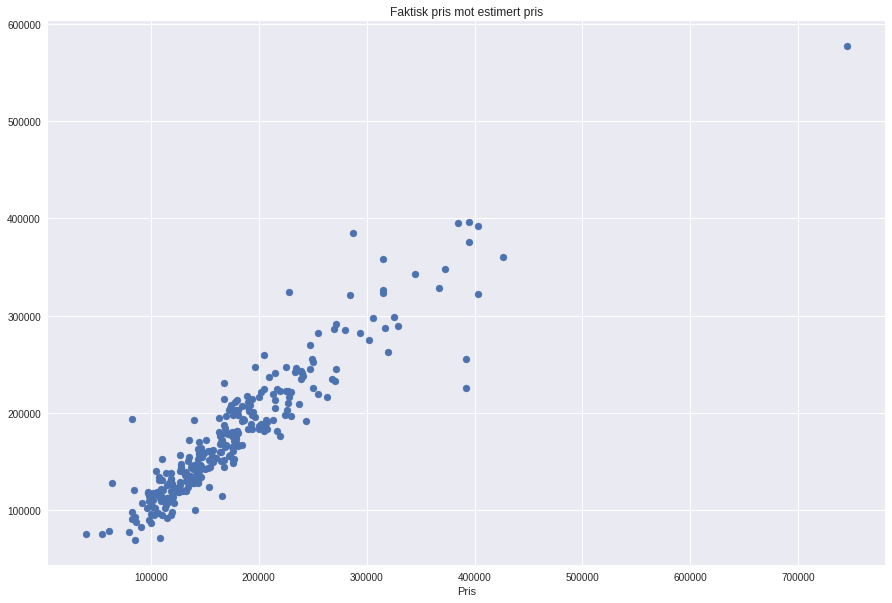

In [86]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_boostreg)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

# Analyse av resultater

##Sammenlikning av modeller

Nå som vi har prediksjoner på salgspris i testdataen fra alle modellene kan vi slå dem sammen i en pandas dataframe for å lettere sammenlikne. Dette gjør vi ved å samle dataen i en dictionary (hashtabell), og deretter opprette en ny dataframe med denne dataen. 

<br> $ dict = \{ 'modell1' : prediksjoner1, 'modell2':prediksjoner2 \} $ <br>

Se <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html"> dokumentasjonen </a>  på denne funksjonen
 

In [87]:
# Definer kolonnenavn til den nye dataframen
kolonner_resultat = ['output_testdata', 'pris_prediksjoner_lineær', 'pris_prediksjon_tre','pris_prediksjon_skog', 'pris_prediksjon_MLPR','pris_prediksjon_boostreg']

#Legg prediksjonsdataen
resultat_data = {'output_testdata':output_testdata, 'pris_prediksjoner_lineær':pris_prediksjoner_lineær, 'pris_prediksjon_tre':pris_prediksjon_tre, 'pris_prediksjon_skog':pris_prediksjon_skog, 'pris_prediksjon_MLPR':pris_prediksjon_MLPR, 'pris_prediksjon_boostreg':pris_prediksjon_boostreg}

resultat = pd.DataFrame(data=resultat_data, columns = kolonner_resultat)
resultat.head(5)

,output_testdata,pris_prediksjoner_lineær,pris_prediksjon_tre,pris_prediksjon_skog,pris_prediksjon_MLPR,pris_prediksjon_boostreg
1378,83000,113956.169638,125000.0,94390.0,100556.934389,97543.210382
1358,177500,151455.697955,172500.0,176150.0,129474.987415,152248.777777
1095,176432,188780.753652,235000.0,187496.4,211849.918791,177138.722526
922,169990,187546.293797,183200.0,185273.2,229728.419968,179628.672832
37,153000,136288.837667,121500.0,131690.0,192249.375384,142766.377436


Vi samler også feilmålingene av modellene i en dataframe

In [88]:
#Alle modeller må være kjørt
MAE_kolonner = ['MAE_lin','MAE_tre','MAE_skog','MAE_MLPR','MAE_boostreg']
feil_data = {'MAE_lin':[MAE_lin], 'MAE_tre':[MAE_tre], 'MAE_skog':[MAE_skog],'MAE_MLPR':[MAE_MLPR], 'MAE_boostreg':MAE_boostreg}

MAE_alle = pd.DataFrame(data=feil_data,columns=MAE_kolonner)
MAE_alle.head()

,MAE_lin,MAE_tre,MAE_skog,MAE_MLPR,MAE_boostreg
0,25576.516969,27077.28866,20273.798969,45265.903132,17708.760802


Vi kan også plotte alle prediksjonspunktene til hver modell oppå hverandre for å visualisere hvordan prediksjons-distribusjonen ser ut. Her plotter vi predikert pris mot ekte pris. Ekte pris plottet mot seg selv blir naturligvis en rett linje, fordi den vil stemme 100% med seg selv.

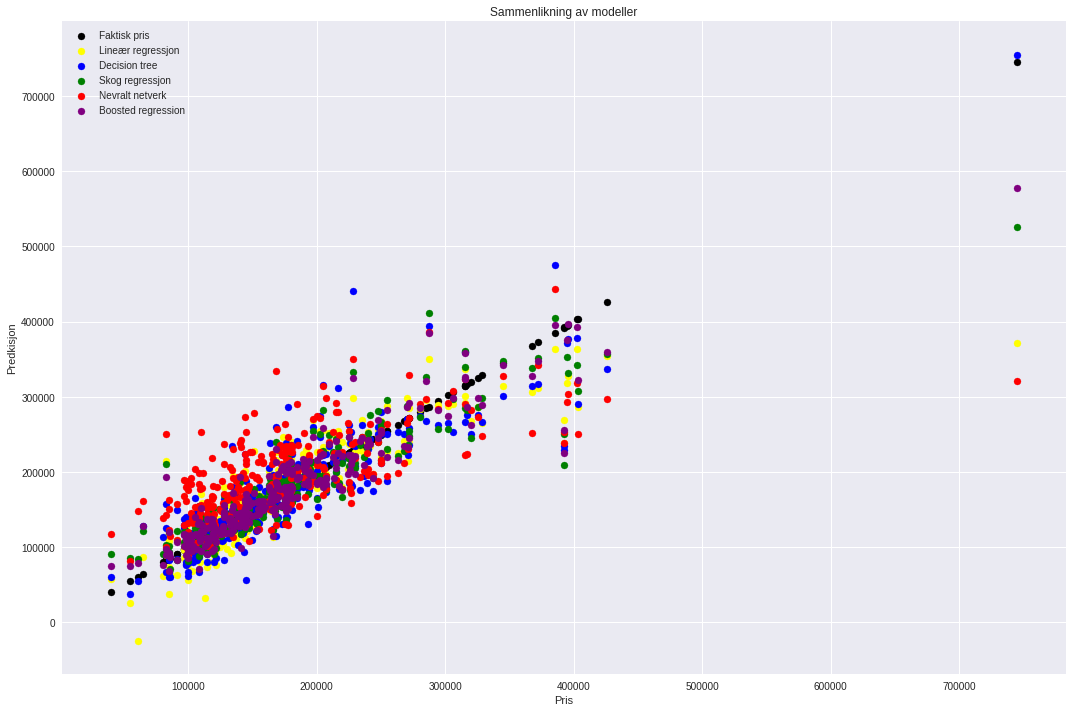

In [89]:
plt.figure(figsize=(18, 12))
plt.scatter(output_testdata, output_testdata, color='black', label='Faktisk pris')
plt.scatter(output_testdata, pris_prediksjoner_lineær, color='yellow', label='Lineær regressjon')
plt.scatter(output_testdata, pris_prediksjon_tre, color='blue', label='Decision tree')
plt.scatter(output_testdata, pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.scatter(output_testdata, pris_prediksjon_MLPR, color='red', label='Nevralt netverk')
plt.scatter(output_testdata, pris_prediksjon_boostreg, color='purple', label='Boosted regression')
plt.ylabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Sammenlikning av modeller')
plt.legend(loc='upper left')
plt.show()

Det kan være mer oversiktlig å visualisere prediksjonene til en modell av gangen.

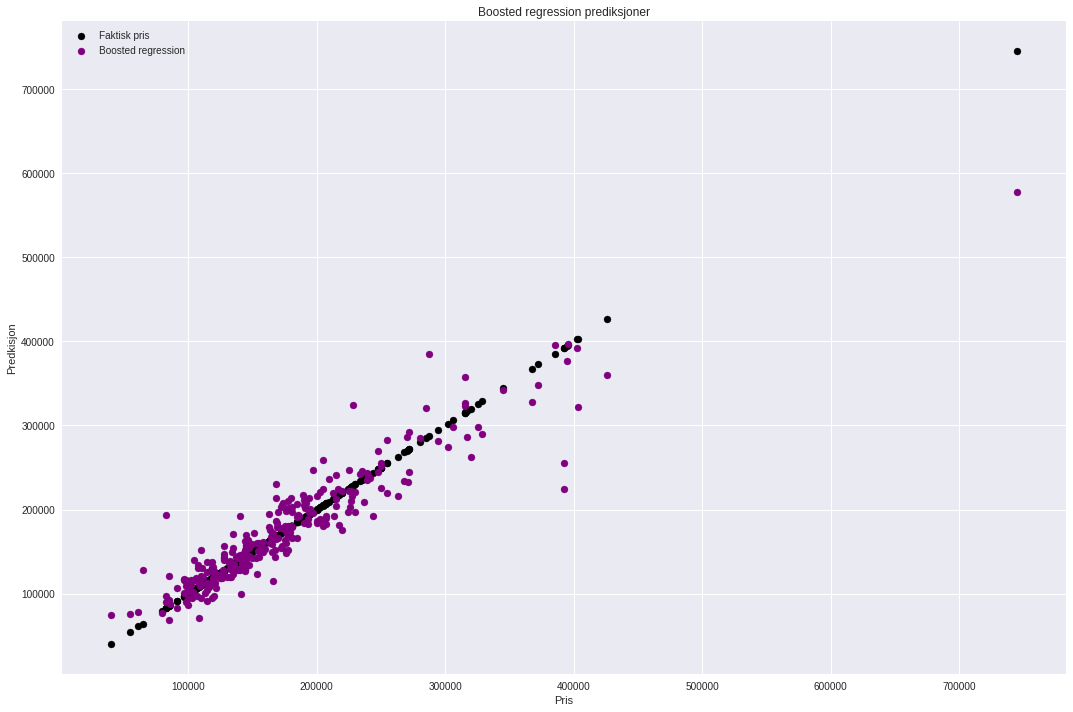

In [90]:
plt.figure(figsize=(18, 12))
plt.scatter(output_testdata, output_testdata, color='black', label='Faktisk pris')
plt.scatter(output_testdata, pris_prediksjon_boostreg, color='purple', label='Boosted regression')
plt.ylabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Boosted regression prediksjoner')
plt.legend(loc='upper left')
plt.show()

## Feature importance



Feature importance er en nyttig måling på hvor mye påvirkning de ulike attributtene har på prediksjonen, altså output. Dette måles ved at 


Often features do not contribute equally to predict the target response; in many situations the majority of the features are in fact irrelevant. When interpreting a model, the first question usually is: what are those important features and how do they contributing in predicting the target response?

Individual decision trees intrinsically perform feature selection by selecting appropriate split points. This information can be used to measure the importance of each feature; the basic idea is: the more often a feature is used in the split points of a tree the more important that feature is. This notion of importance can be extended to decision tree ensembles by simply averaging the feature importance of each tree (see Feature importance evaluation for more details). *italicized text*

In [91]:
plt.figure(figsize=[15,10])
feat_imp = pd.Series(modell_lineær.feature_importances_, input_treningsdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances decision tree')
plt.ylabel('Feature Importance Score')
plt.show()

AttributeError: ignored

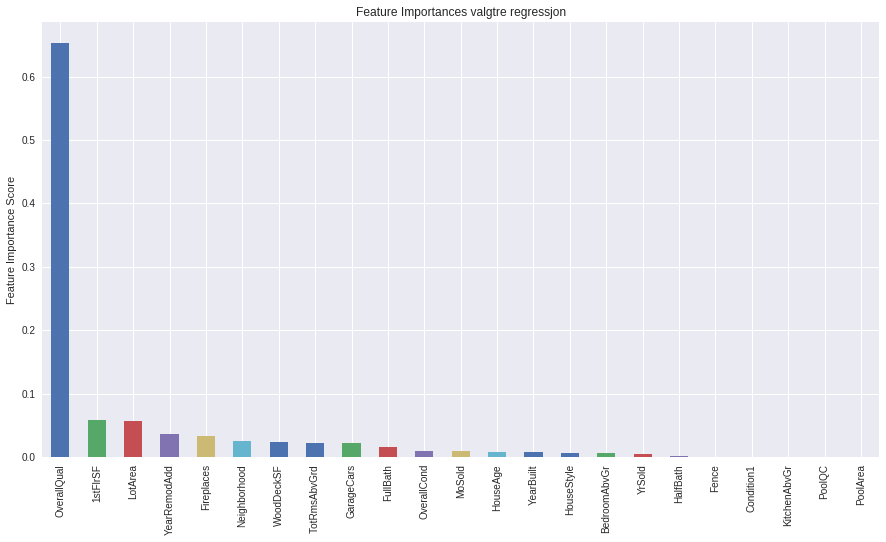

In [92]:
plt.figure(figsize=[15,8])
feat_imp = pd.Series(modell_tre.feature_importances_, input_treningsdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances valgtre regressjon')
plt.ylabel('Feature Importance Score')
plt.show()

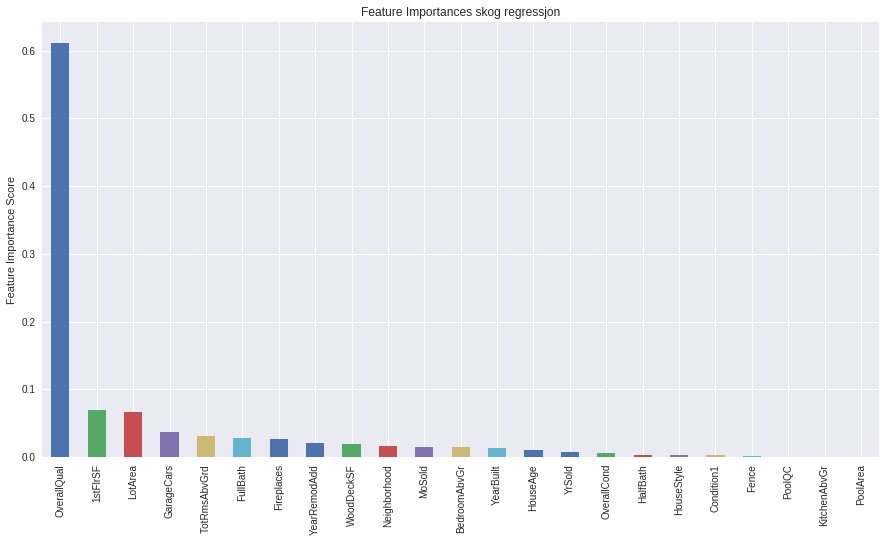

In [93]:
plt.figure(figsize=[15,8])
feat_imp = pd.Series(modell_skog.feature_importances_, input_treningsdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances skog regressjon')
plt.ylabel('Feature Importance Score')
plt.show()

In [0]:
plt.figure(figsize=[15,10])
feat_imp = pd.Series(modell_MLPR.feature_importances_, input_treningsdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances decision tree')
plt.ylabel('Feature Importance Score')
plt.show()

AttributeError: ignored

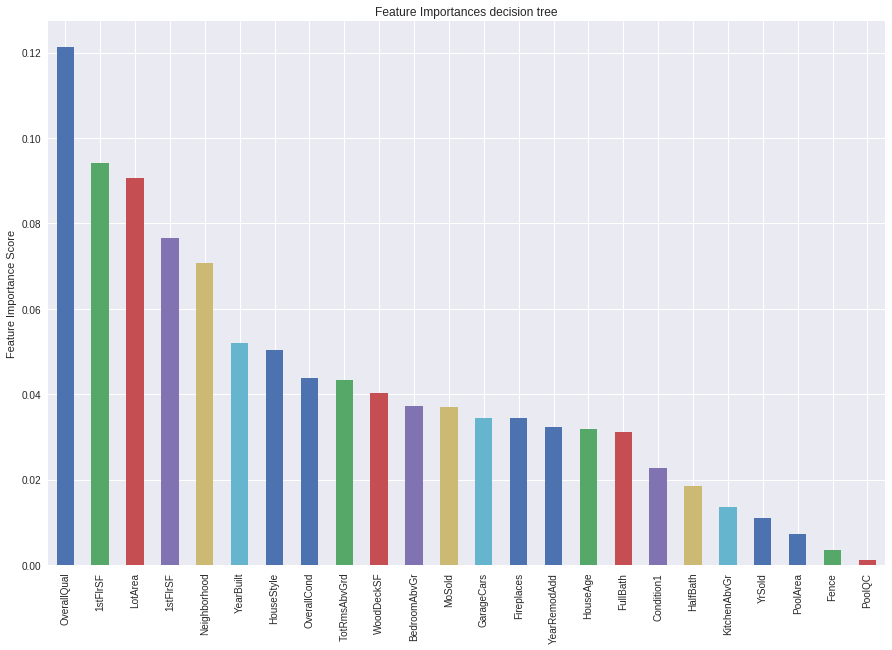

In [0]:
plt.figure(figsize=[15,10])
feat_imp = pd.Series(modell_boostreg.feature_importances_, input_treningsdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances decision tree')
plt.ylabel('Feature Importance Score')
plt.show()

Lineær regressjon og nevralt nettverk kan ikke gi feature importance 

## Partial dependence plots


Partial dependence plots (PDP) show the dependence between the target response and a set of ‘target’ features, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response [1] as a function of the ‘target’ features [2].

Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

The Figure below shows four one-way and one two-way partial dependence plots for the California housing dataset:

../_images/sphx_glr_plot_partial_dependence_0011.png
One-way PDPs tell us about the interaction between the target response and the target feature (e.g. linear, non-linear). The upper left plot in the above Figure shows the effect of the median income in a district on the median house price; we can clearly see a linear relationship among them.

PDPs with two target features show the interactions among the two features. For example, the two-variable PDP in the above Figure shows the dependence of median house price on joint values of house age and avg. occupants per household. We can clearly see an interaction between the two features: For an avg. occupancy greater than two, the house price is nearly independent of the house age, whereas for values less than two there is a strong dependence on age.

The module partial_dependence provides a convenience function plot_partial_dependence to create one-way and two-way partial dependence plots. In the below example we show how to create a grid of partial dependence plots: two one-way PDPs for the features 0 and 1 and a two-way PDP between the two features:













Partial dependence plots viser hvordan hver input variabel påvirker prediksjonen, eller output. Dette bidrar til å forstå hvordan modellen oppfører seg. 

Slik det funker er at den ferdig trente modellen blir testet for ulike features. En registrering blir sent inn i modellen, men så blir featuren vi ønsker å undersøke økt fra minimal verdi til maksimal verdi. Skal vi for eksempel teste for kvadratfot, begynner vi å teste for 0 kvf. Deretter øker vi kvf fot gradvis og ser hvordan prisprediksjonen endrer seg, inntil vi når mengden til den største tomten i datasettet. Under kan man ser hvordan prisen økergradvis i takt med økende kvf. Altså har LotArea en positiv effekt på pris, jo større tomt jo dyrere pris.


Les mer <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.partial_dependence.plot_partial_dependence.html#sklearn.ensemble.partial_dependence.plot_partial_dependence
">Scikit-learn dokumentasjon</a>

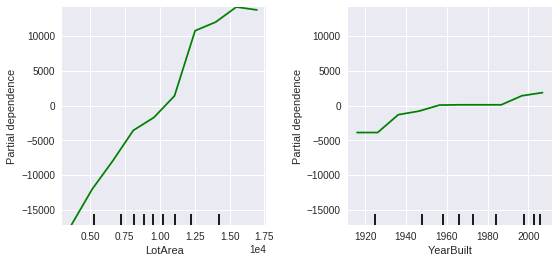

In [0]:
features = input_treningsdata.columns

my_plot = plot_partial_dependence(modell_boostreg, features=[0, 7], X=input_treningsdata, feature_names=features, grid_resolution=10, n_cols=2)


Her ser vi at husalder har en negativ påvirkning på prisen når den stiger, men den påvirker negativt i like stor grad når huset er over ca 35 år. Det er derimot en veldig positiv påvirkning når huset er under 10 år gammelt.

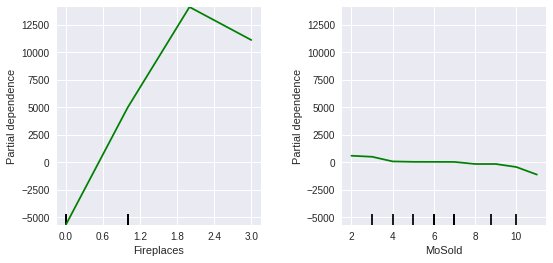

In [0]:

my_plot = plot_partial_dependence(modell_boostreg, features=[18, 21], X=input_treningsdata, feature_names=features, grid_resolution=10, n_cols=2)

Vi kan teste dette på andre features i treningssettet, de er nummerert fra 0 til 22 nedover. Under er alle featurene printet ut med tilhørende index.

**merk at scikit-learn støtter denne funksjonen kun for gradient boosting modellen**

In [0]:
#Nummerering på hver feature
for i, element in enumerate(features):
  print(i,element)

0 LotArea
1 Neighborhood
2 WoodDeckSF
3 Condition1
4 HouseStyle
5 OverallQual
6 OverallCond
7 YearBuilt
8 YearRemodAdd
9 1stFlrSF
10 1stFlrSF
11 FullBath
12 HalfBath
13 BedroomAbvGr
14 Fence
15 KitchenAbvGr
16 TotRmsAbvGrd
17 GarageCars
18 Fireplaces
19 PoolArea
20 PoolQC
21 MoSold
22 YrSold
23 HouseAge


## Valgtre visualisering



In [0]:
!pip install pydotplus
!pip install GraphViz

In [94]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
            
dot_data = StringIO()
export_graphviz(modell_tre, out_file=dot_data,  
                            filled=True, rounded=True,
                            special_characters=True,
                            feature_names=input_data.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
tree = Image(graph.create_png())

ModuleNotFoundError: ignored

##Oppgave: Bygg model

Bygg din egen modell på datasettet du lagde i tidligere seksjon. Husk å dele opp datasettet i trenings og test data ved å bruke:

<br> $ train\_test\_split(x,y,test\_size = 0.2, random\_state=1) $ <br>

**NB! Ha med test_size = 0.2 og  random_state = 1 slik at samme registreringer blir utvalgt til å være i testsettet, slik blir resultatene mer sammenliknbare mellom modellene og alle som deltar.**

Velg hvilken modell du vil bruke, gjerne noen andre enn de som er gått gjennom her, og juster modell parametrene for å få så lav MAE som mulig.



<a href="http://scikit-learn.org/stable/supervised_learning.html
">Scikit-learn supervised learning</a>

Bruk også gjerne modellene og datasettet som allerede er satt opp og endre parameterene og utvalgte features for å forbedre modellen. Visualiser resultatene fra modellen(e).

Til slutt: lag en boosted regression modell på datasettet ditt og skriv ut partial dependence plots.

In [0]:
#Skriv kode her

## Realistisk test

In [106]:
import numpy as np
modell_dict = {'modell_lineær':modell_lineær, 'modell_tre':modell_tre, 'modell_skog':modell_skog, 'modell_MLPR':modell_MLPR,'modell_boostreg':modell_boostreg}

#@title String fields

# valg av modell
modell_test = 'modell_line\xE6r' #@param ["modell_lineær", "modell_tre", "modell_skog", "modell_MLPR", "modell_boostreg"] {allow-input: true}



#Valg av parametre

LotArea =  0 #@param {type:"integer"}
Neighborhood = 'CollgCr' #@param ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst','NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes','SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert','StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU','Blueste'] {allow-input: true}
WoodDeckSF = 0 #@param {type:"integer"}
Condition2 = 'Norm' #@param ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA','RRNe'] {allow-input: true}
HouseStyle = '2Story' #@param ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'] {allow-input: true}
OverallQual = 1 #@param {type:"slider", min:1, max:10, step:1}
OverallCond = 1 #@param {type:"slider", min:1, max:10, step:1}
YearBuilt = 1870 #@param {type:"slider", min:1870, max:2010, step:1}
YearRemodAdd = 1950 #@param {type:"slider", min:1950, max:2010, step:1}

#@markdown 1stFlrSF er kvadratfot i 1. etg

FirstFlrSF = 0 #@param {type:'integer'}
FullBath = 0 #@param {type:'integer'}
HalfBath = 0 #@param {type:'integer'}
BedroomAbvGr = 0 #@param {type:'integer'}
Fence = 'Velg' #@param ['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'] {allow-input: true}
KitchenAbvGr = 0 #@param {type:'integer'}
TotRmsAbvGrd = 0 #@param {type:'integer'}
GarageCars = 0 #@param {type:'integer'}
Fireplaces = 0 #@param {type:'integer'}
PoolArea = 0 #@param {type:'integer'}
MoSold = 12 #@param {type:"slider", min:1, max:12, step:1}
YrSold = 0 #@param {type:'integer'}
HouseAge = 0 #@param {type:'integer'}

test_input = np.array([LotArea, Neighborhood_enc.fit(Neighborhood), WoodDeckSF, Condition2, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, FirstFlrSF, FullBath, HalfBath, BedroomAbvGr, Fence, KitchenAbvGr, TotRmsAbvGrd, GarageCars, Fireplaces, PoolArea, MoSold, YrSold, HouseAge]).reshape(-1,1)
print(test_input)
test_input = np.array([LotArea, Neighborhood, WoodDeckSF, Condition2, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, FirstFlrSF, FullBath, HalfBath, BedroomAbvGr, Fence, KitchenAbvGr, TotRmsAbvGrd, GarageCars, Fireplaces, PoolArea, MoSold, YrSold, HouseAge]).reshape(-1,1)


#Neighborhood_enc = preprocessing.LabelEncoder()
#Condition1 = preprocessing.LabelEncoder()
#HouseStyle = preprocessing.LabelEncoder()
#Fence = preprocessing.LabelEncoder()
#PoolQualityCondition = preprocessing.LabelEncoder()

#modell_valg = modell_dict[modell_test]

#est = modell_valg.predict(test_input)

#print(modell_valg)
#print('Modell brukt: {}'.format(modell_test))
#print('Predikert boligpris: {}'.format(est))
#print(test_input)
#

ValueError: ignored

In [0]:
data_modell.columns

Index(['LotArea', 'Neighborhood', 'WoodDeckSF', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       '1stFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fence',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'Fireplaces', 'PoolArea',
       'PoolQC', 'MoSold', 'YrSold', 'HouseAge', 'SalePrice'],
      dtype='object')

In [0]:
data_modell.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

In [0]:
list(range(11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [0]:
data_modell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 25 columns):
LotArea         1455 non-null int64
Neighborhood    1455 non-null object
WoodDeckSF      1455 non-null int64
Condition1      1455 non-null object
HouseStyle      1455 non-null object
OverallQual     1455 non-null int64
OverallCond     1455 non-null int64
YearBuilt       1455 non-null int64
YearRemodAdd    1455 non-null int64
1stFlrSF        1455 non-null int64
1stFlrSF        1455 non-null int64
FullBath        1455 non-null int64
HalfBath        1455 non-null int64
BedroomAbvGr    1455 non-null int64
Fence           1455 non-null object
KitchenAbvGr    1455 non-null int64
TotRmsAbvGrd    1455 non-null int64
GarageCars      1455 non-null int64
Fireplaces      1455 non-null int64
PoolArea        1455 non-null int64
PoolQC          1455 non-null object
MoSold          1455 non-null int64
YrSold          1455 non-null int64
HouseAge        1455 non-null int64
SalePrice       1455 non